In [24]:
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as mad
from scipy.stats import iqr
from hyppo.ksample import MMD
from collections import defaultdict

In [4]:
with open('flickr_attentionheads_attentionmatrixV2.json', 'r') as jsonFile:
    d = json.load(jsonFile)

In [32]:
np.array(d[f'{word1}_{i}'])[0].shape

(12, 12)

In [35]:
np.array(X).shape

(369, 144)

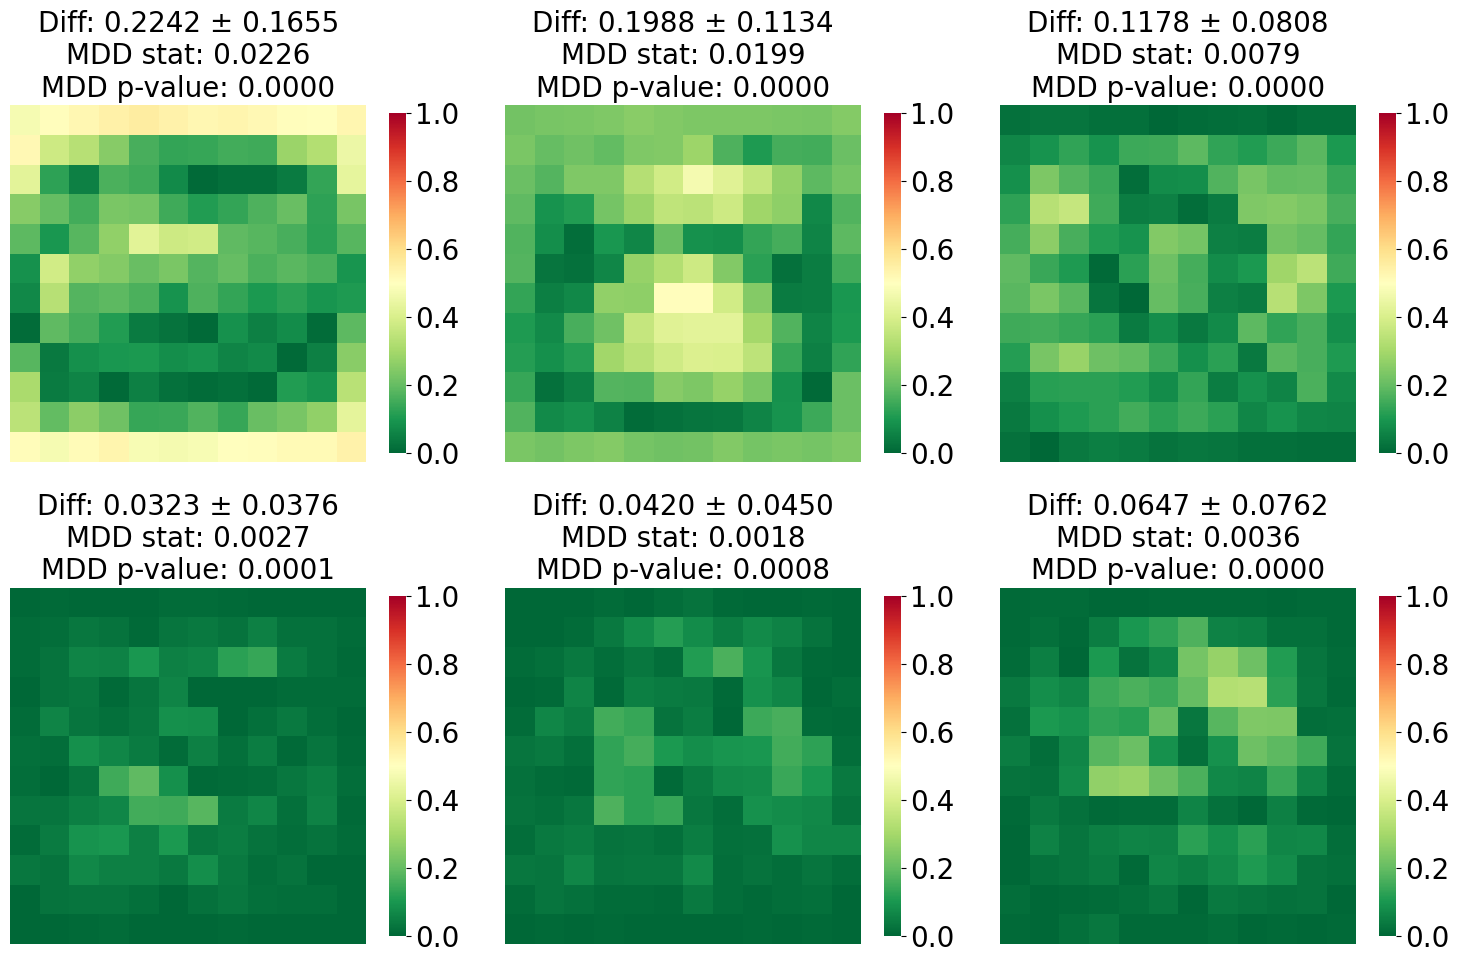

In [47]:
word1 = 'homem'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'mulher'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

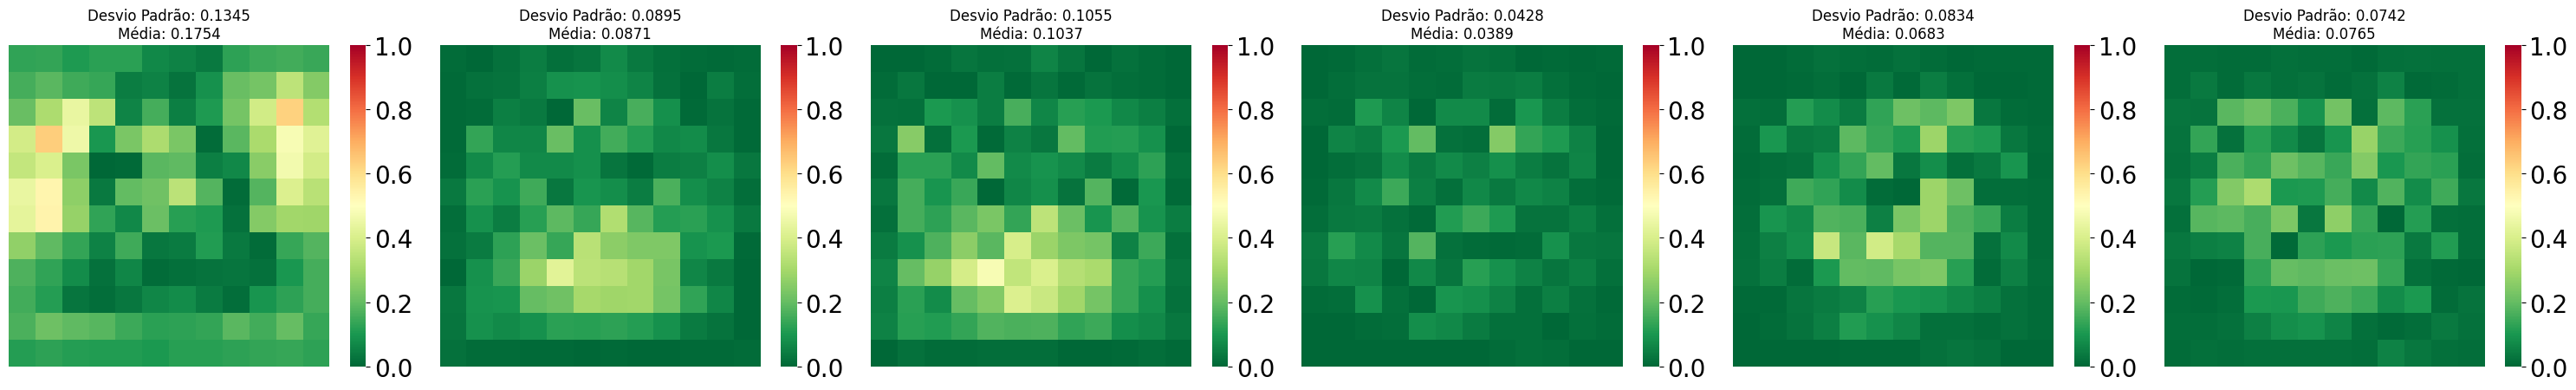

In [52]:
word1 = 'homem'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'cão'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

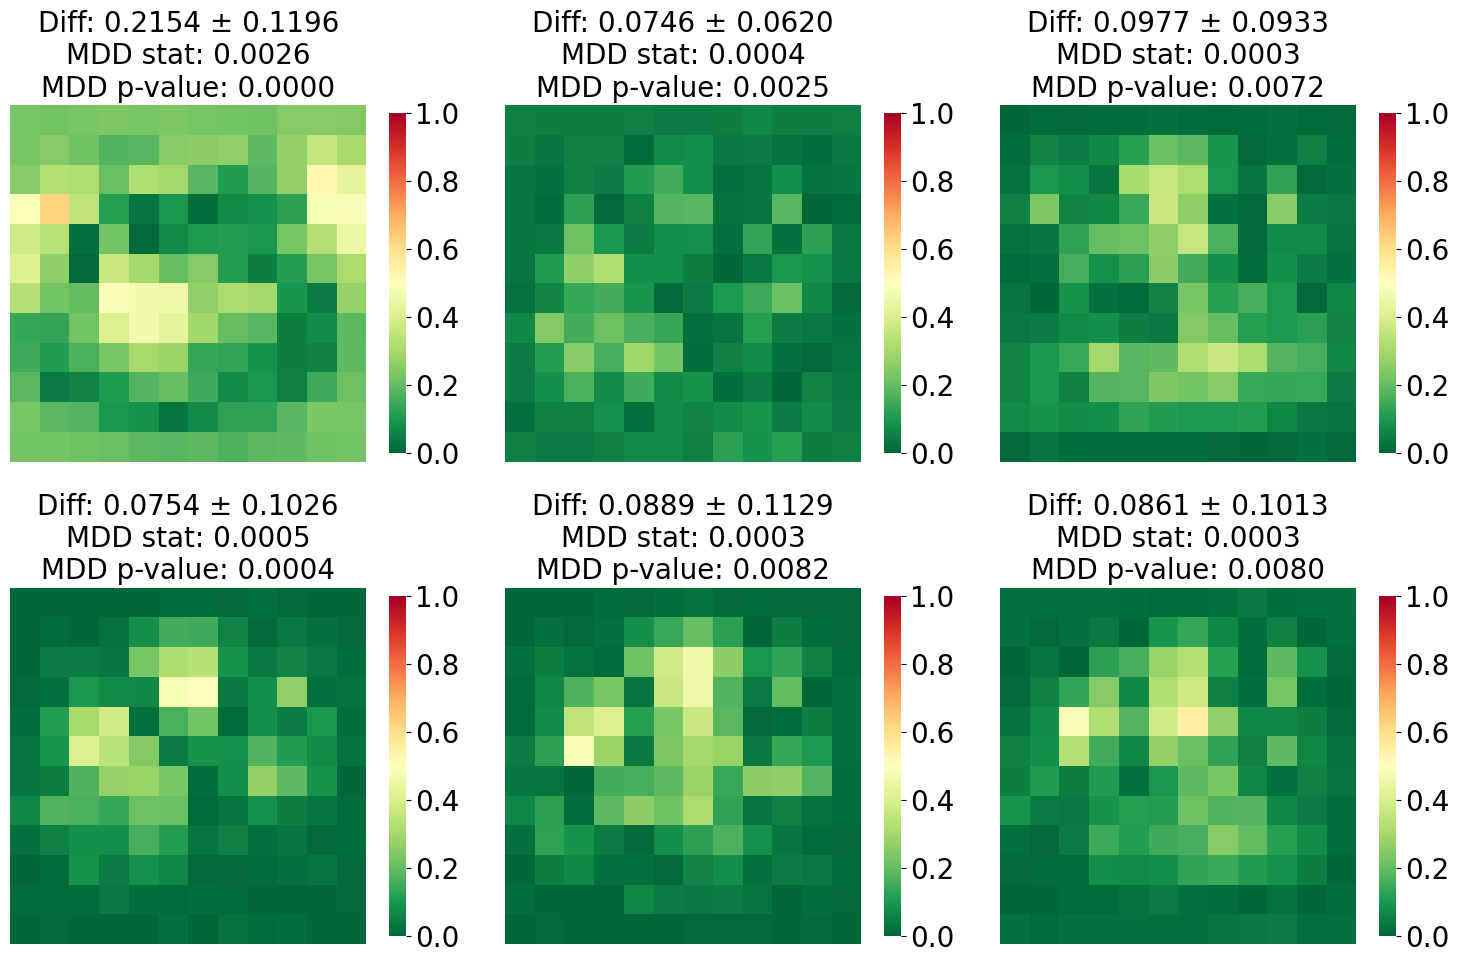

In [48]:
word1 = 'homem'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'homens'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

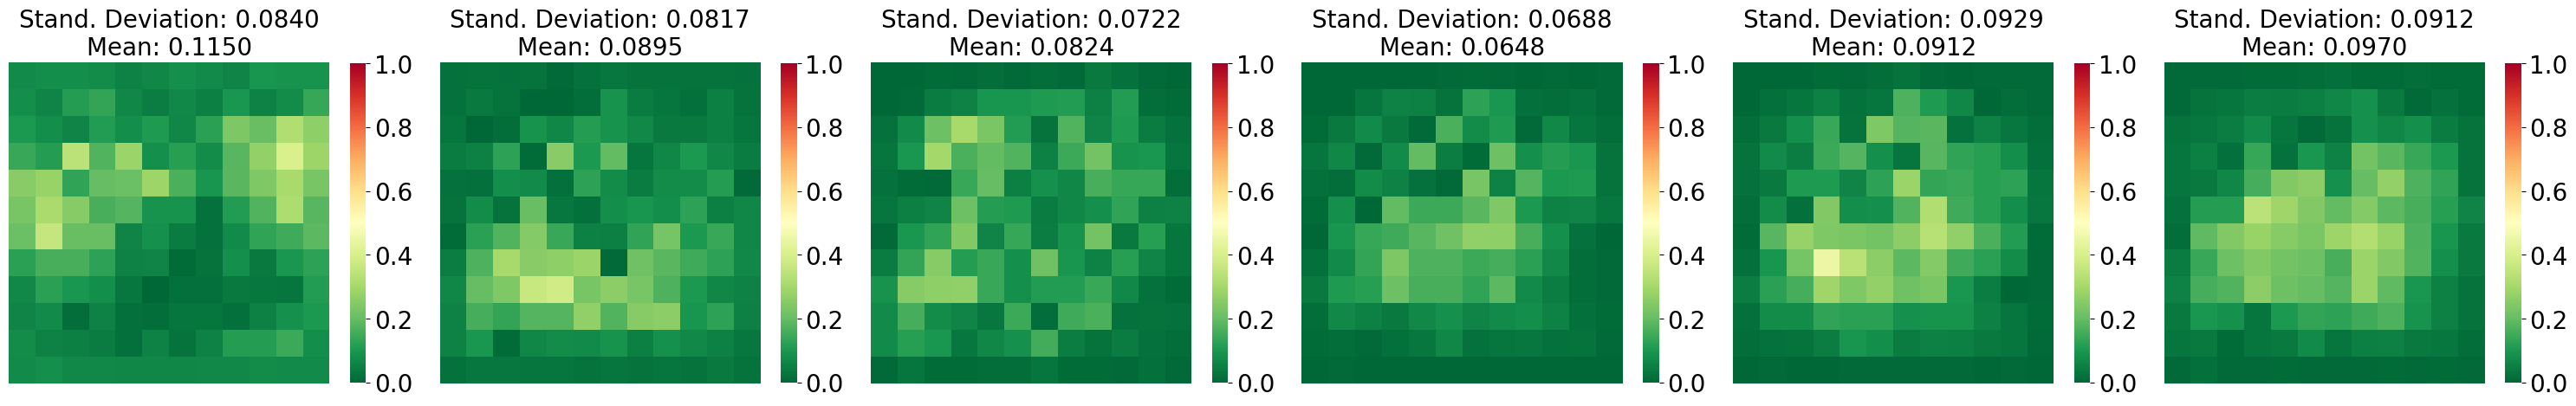

In [9]:
word1 = 'rapaz'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'homem'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

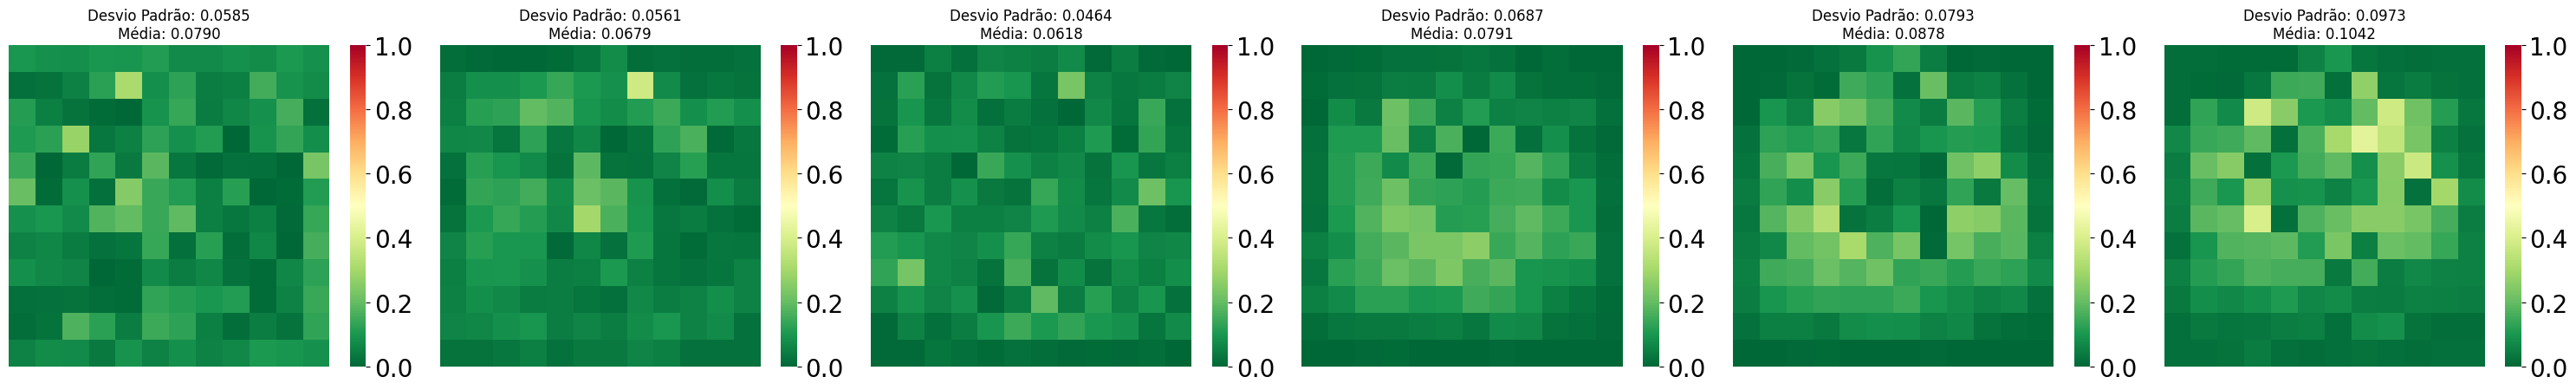

In [3]:
word1 = 'mulher'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'criança'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

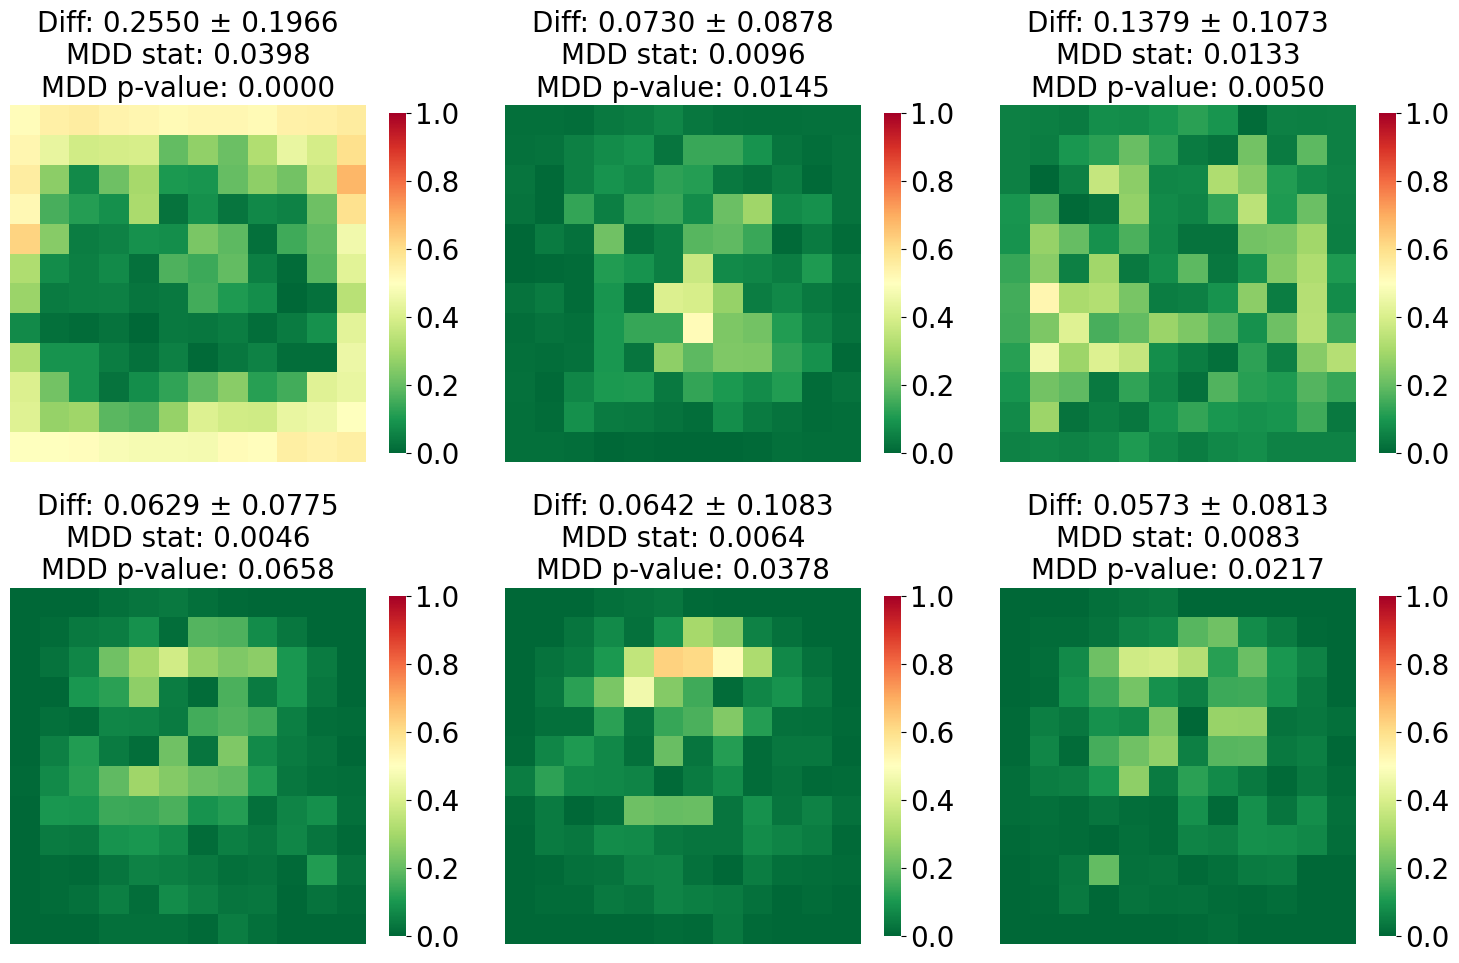

In [50]:
word1 = 'rapaz'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'menina'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

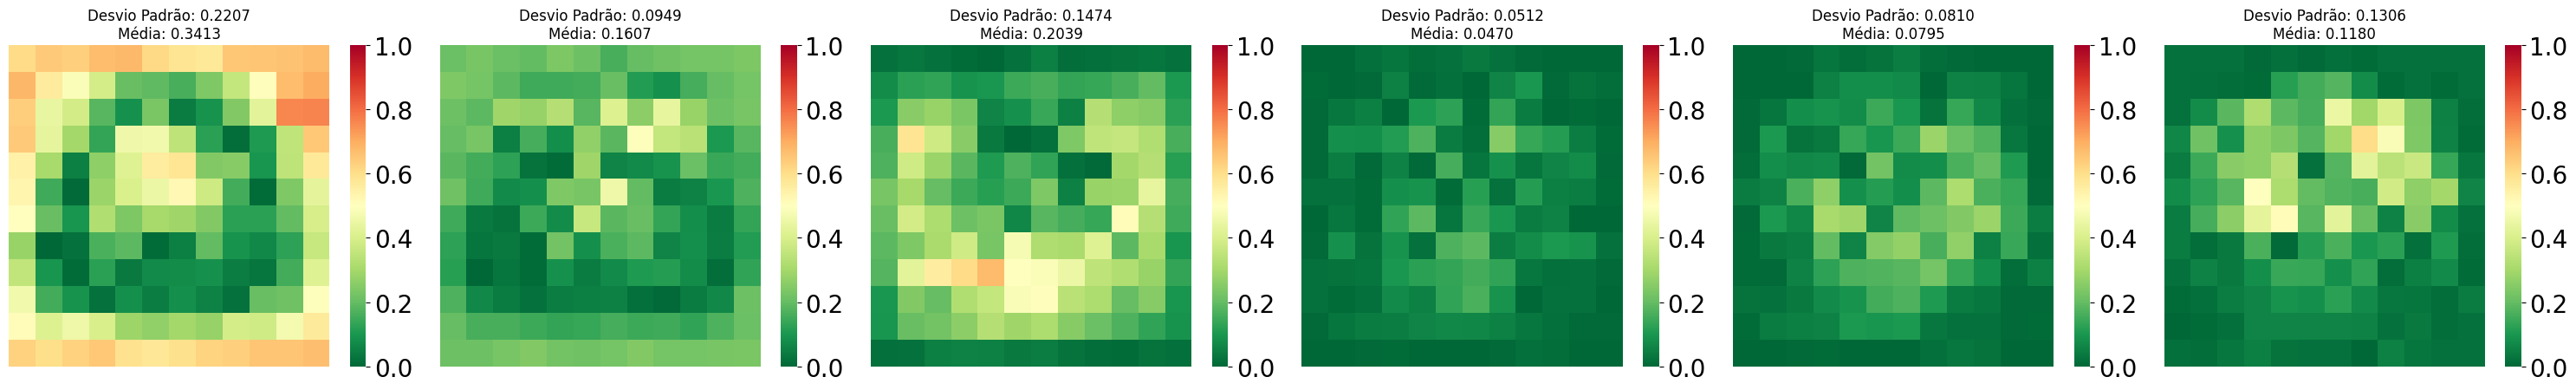

In [50]:
word1 = 'mulher'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'cão'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

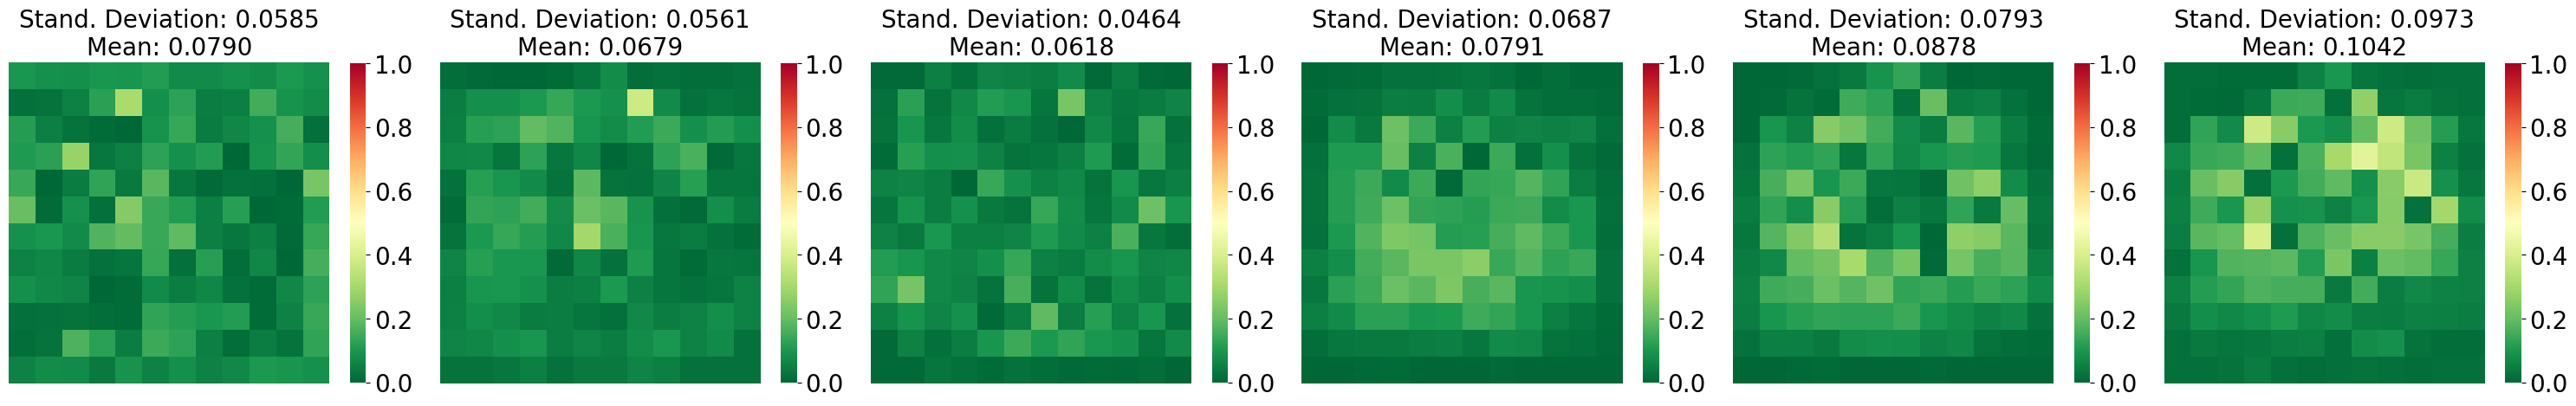

In [6]:
word1 = 'mulher'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'criança'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

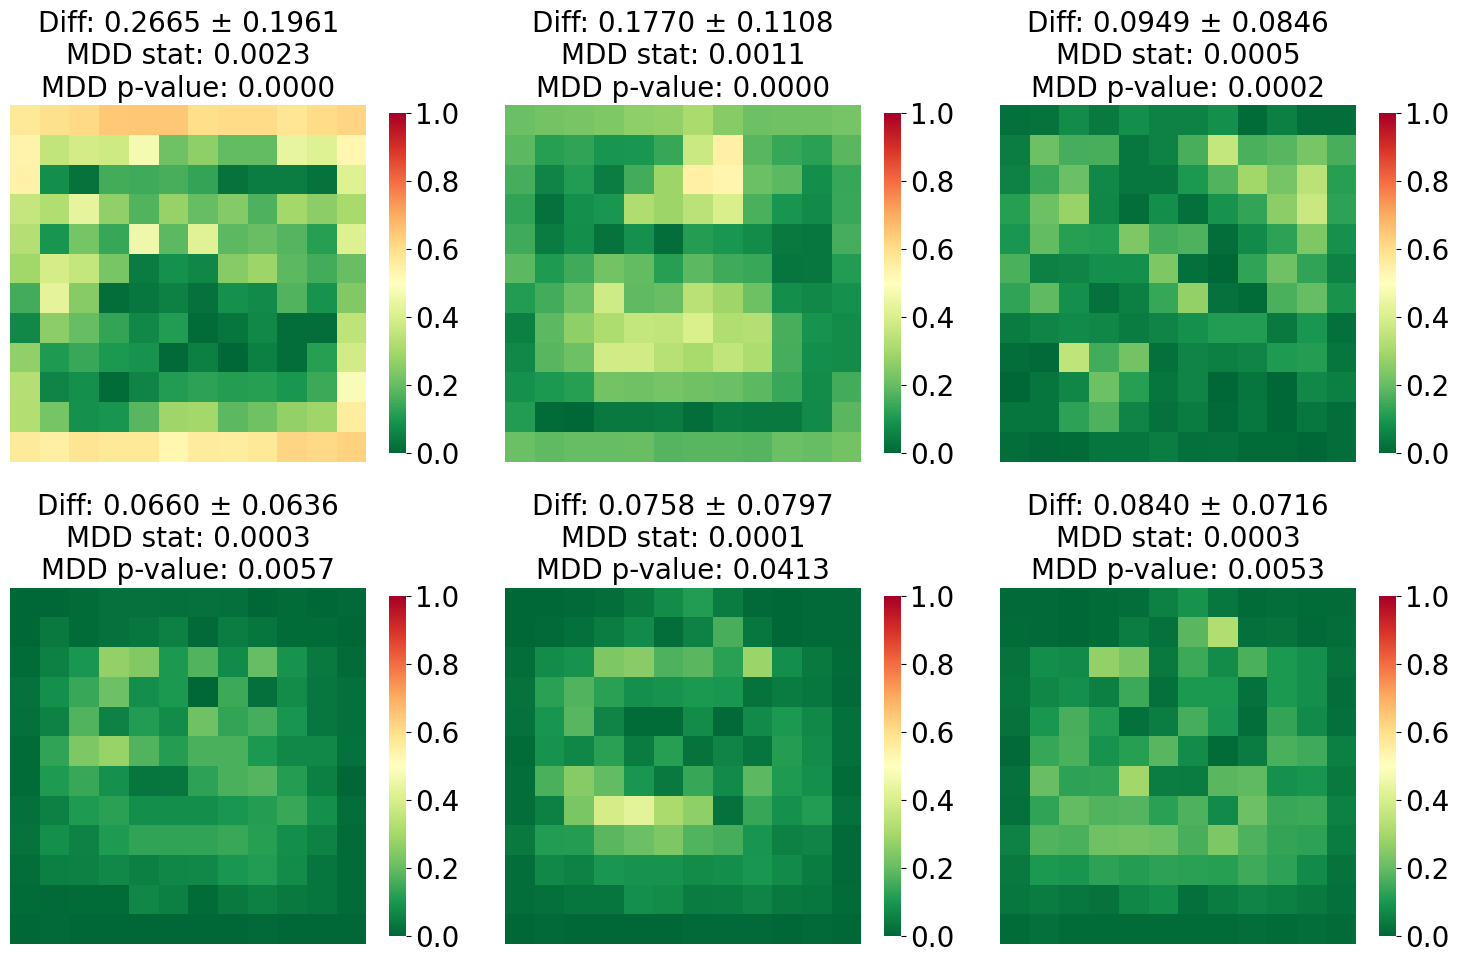

In [51]:
word1 = 'homem'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'criança'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

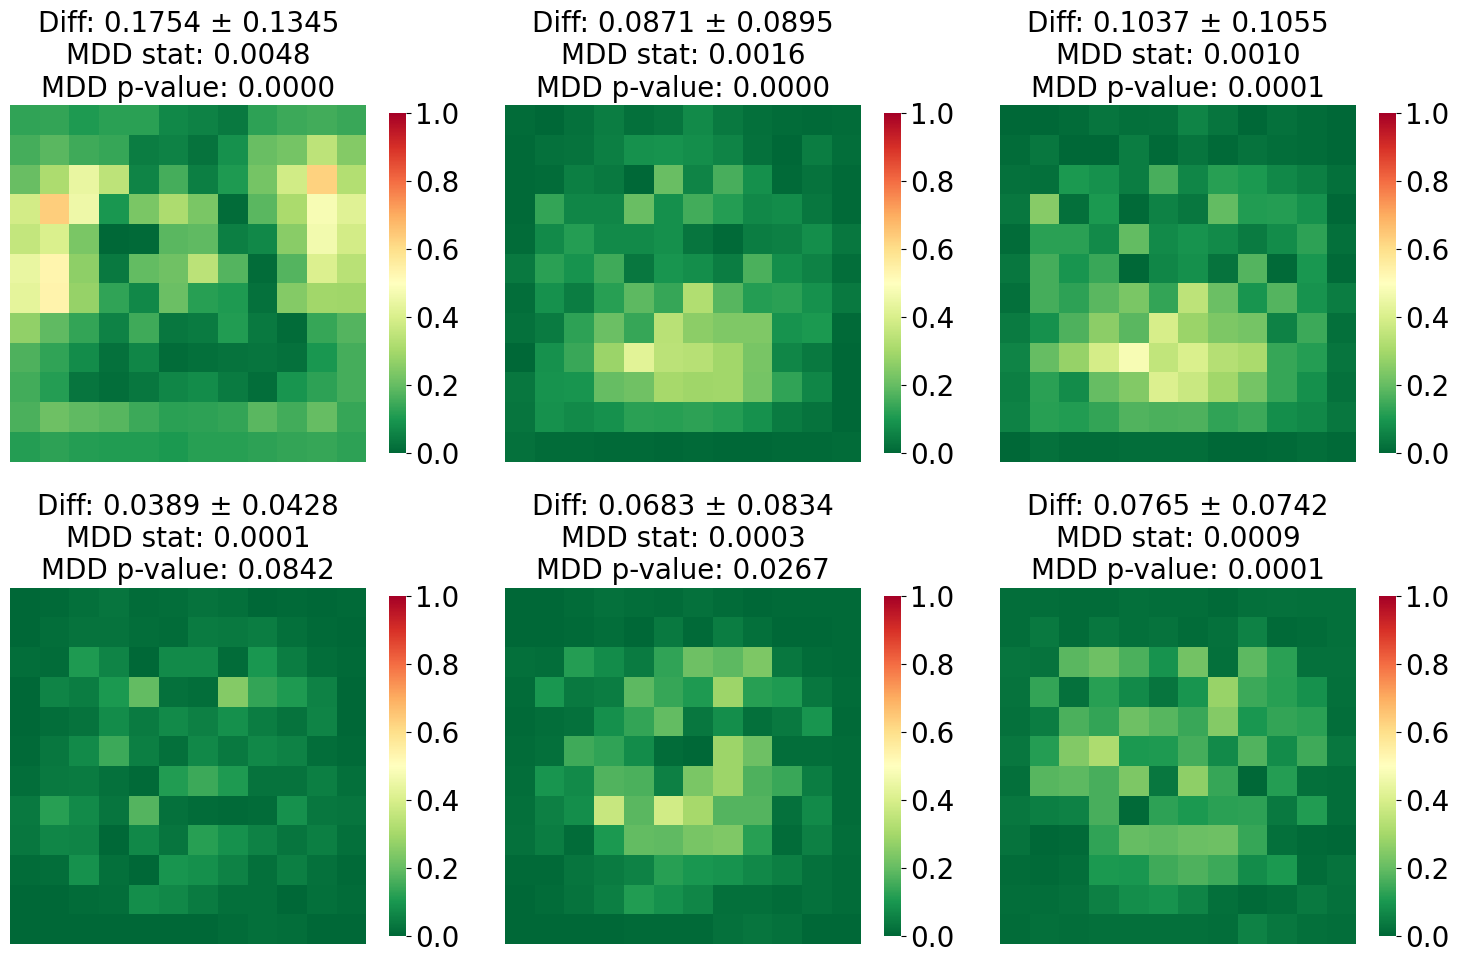

In [52]:
word1 = 'homem'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'cão'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

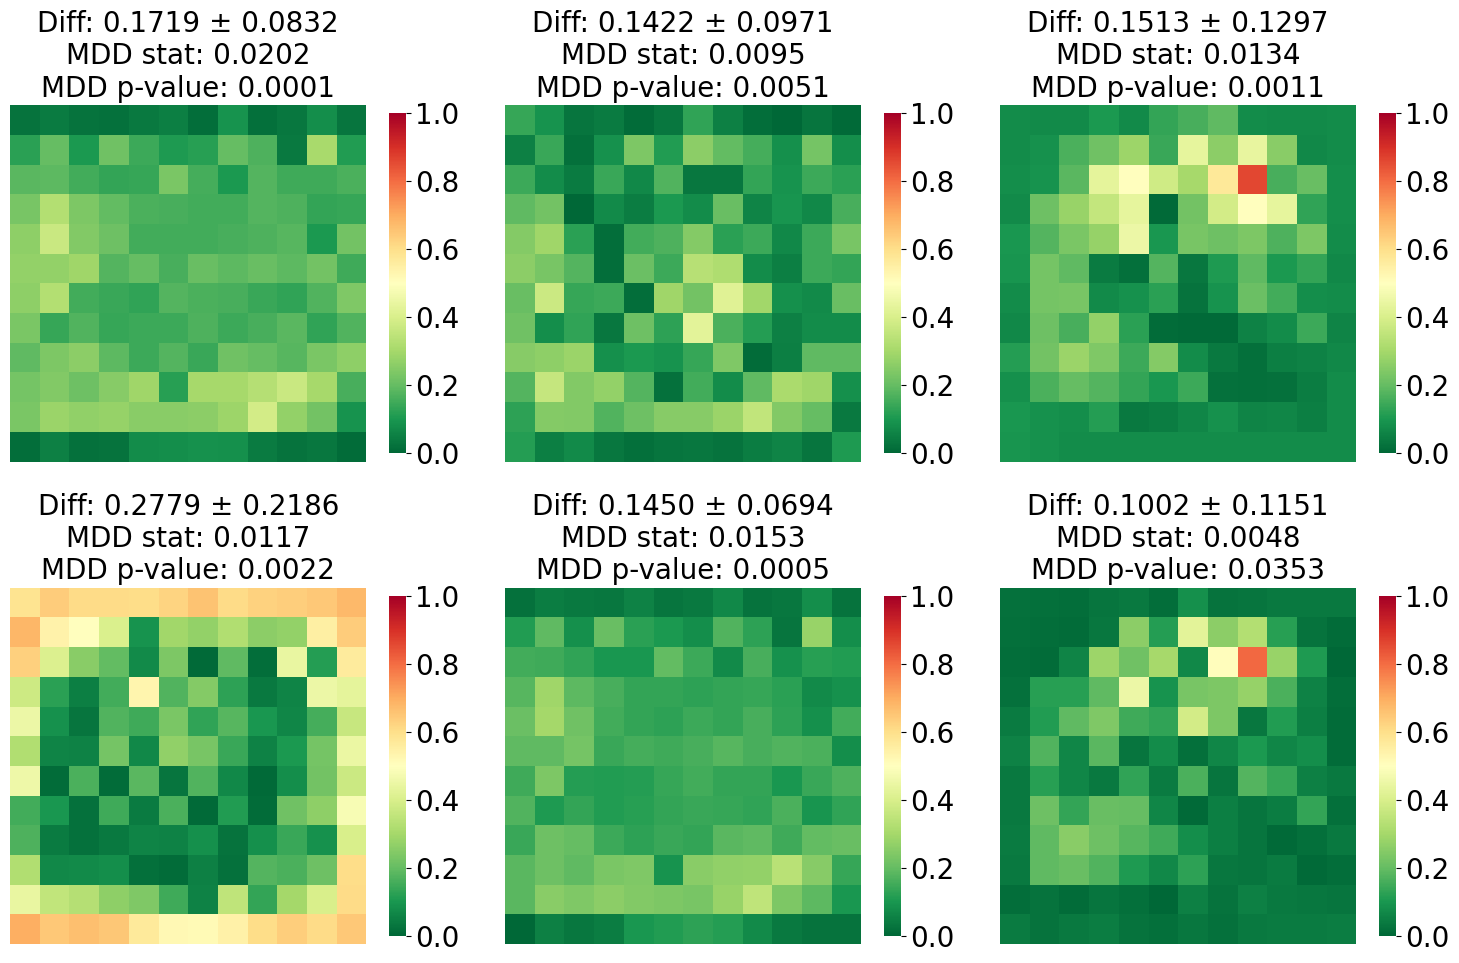

In [53]:
word1 = 'preto'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'branco'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

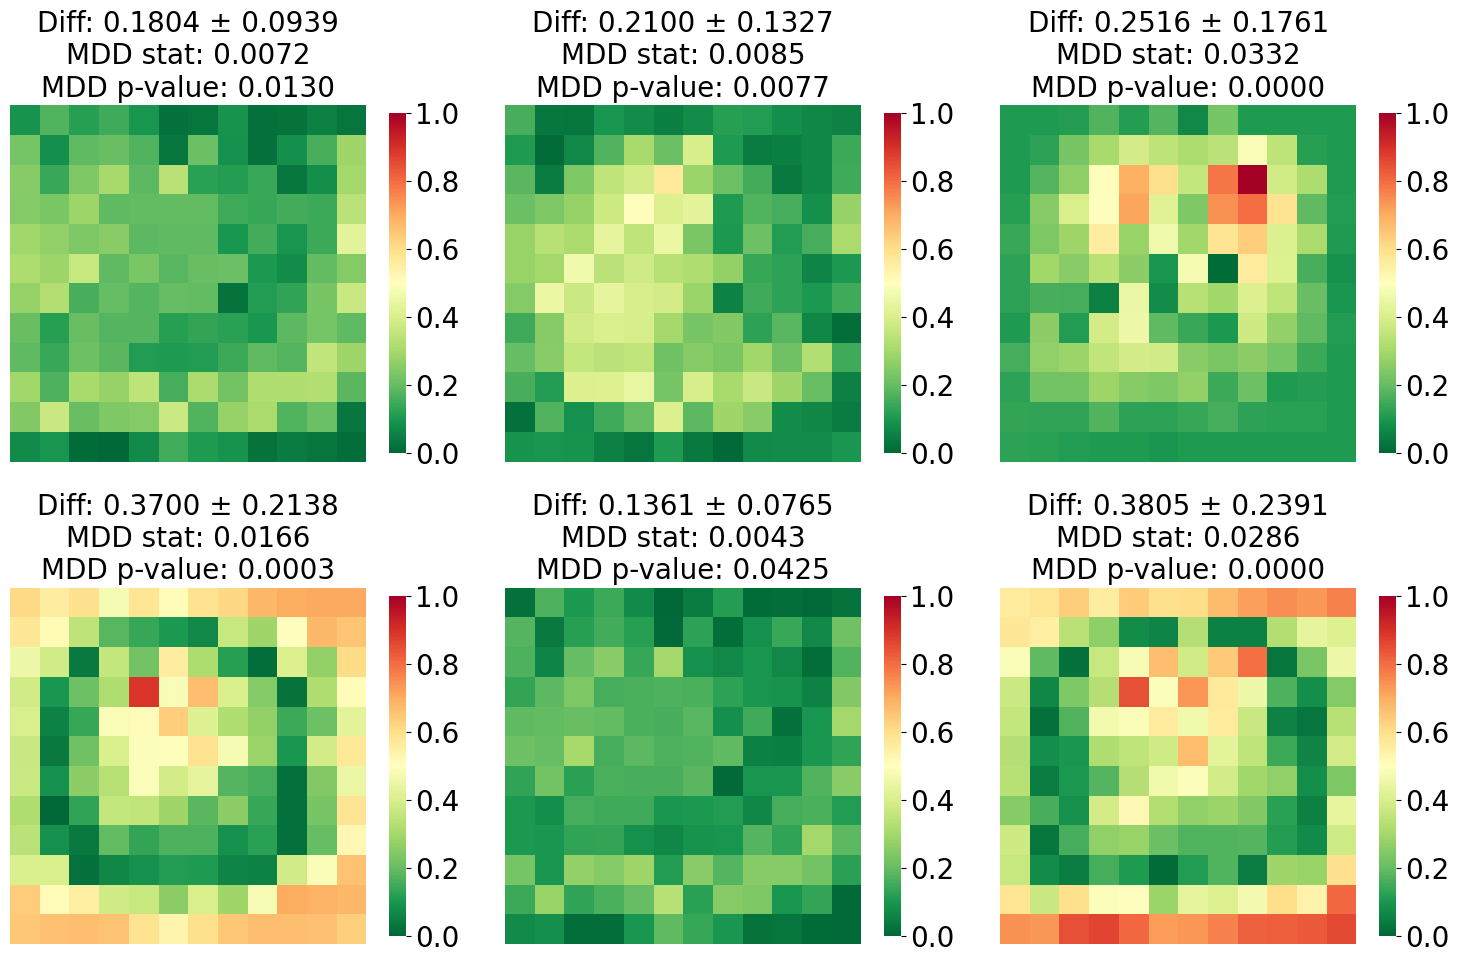

In [54]:
word1 = 'branca'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'branco'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

QTD preta: 26
QTD preto: 49


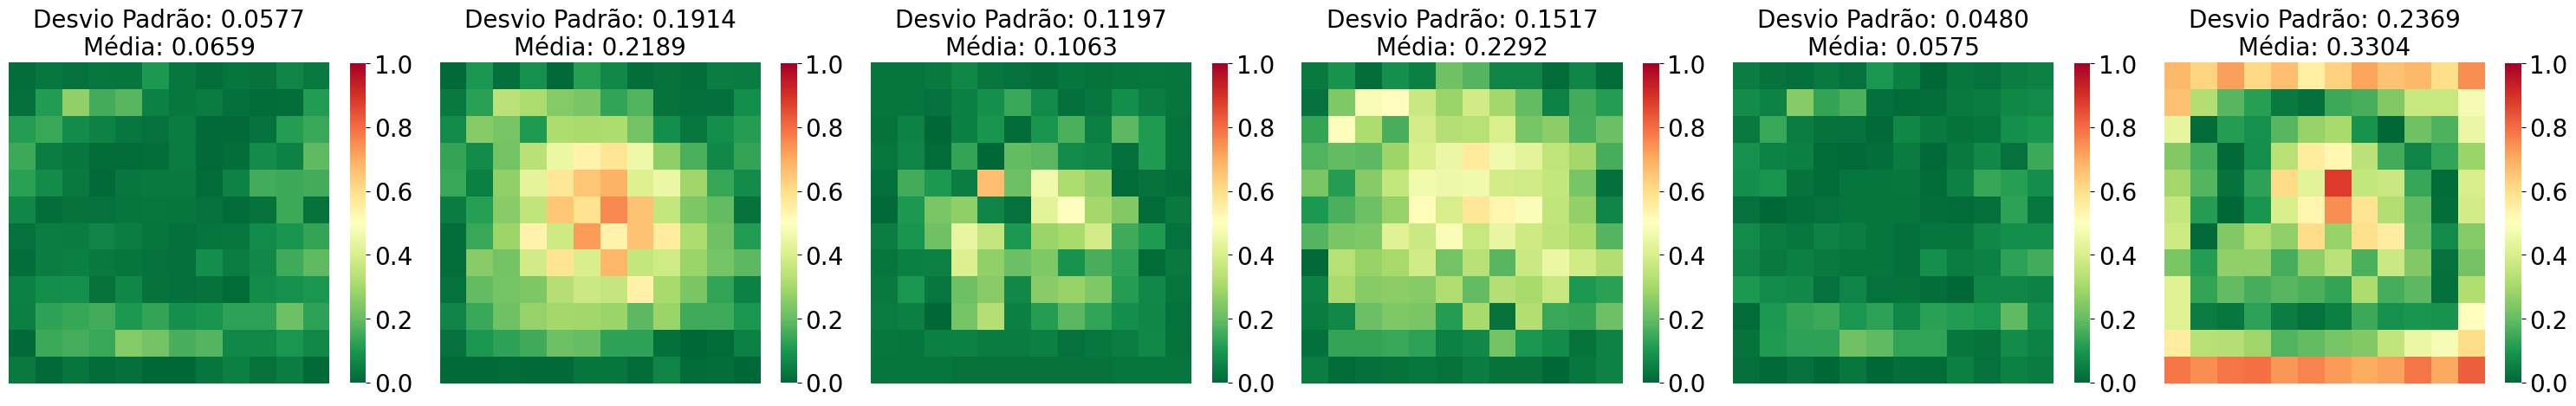

In [38]:
word1 = 'preta'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'preto'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD vermelho: 93
QTD branca: 12


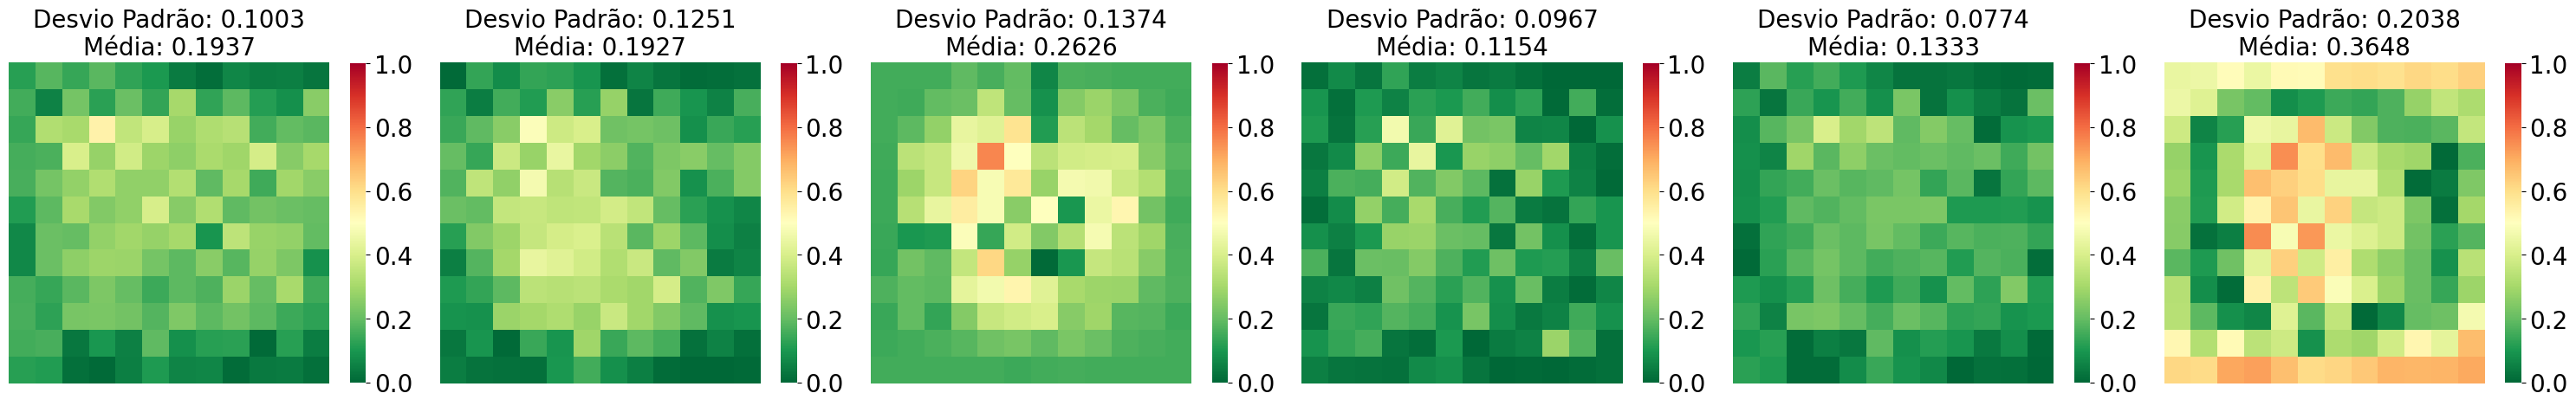

In [42]:
word1 = 'vermelho'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'branca'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

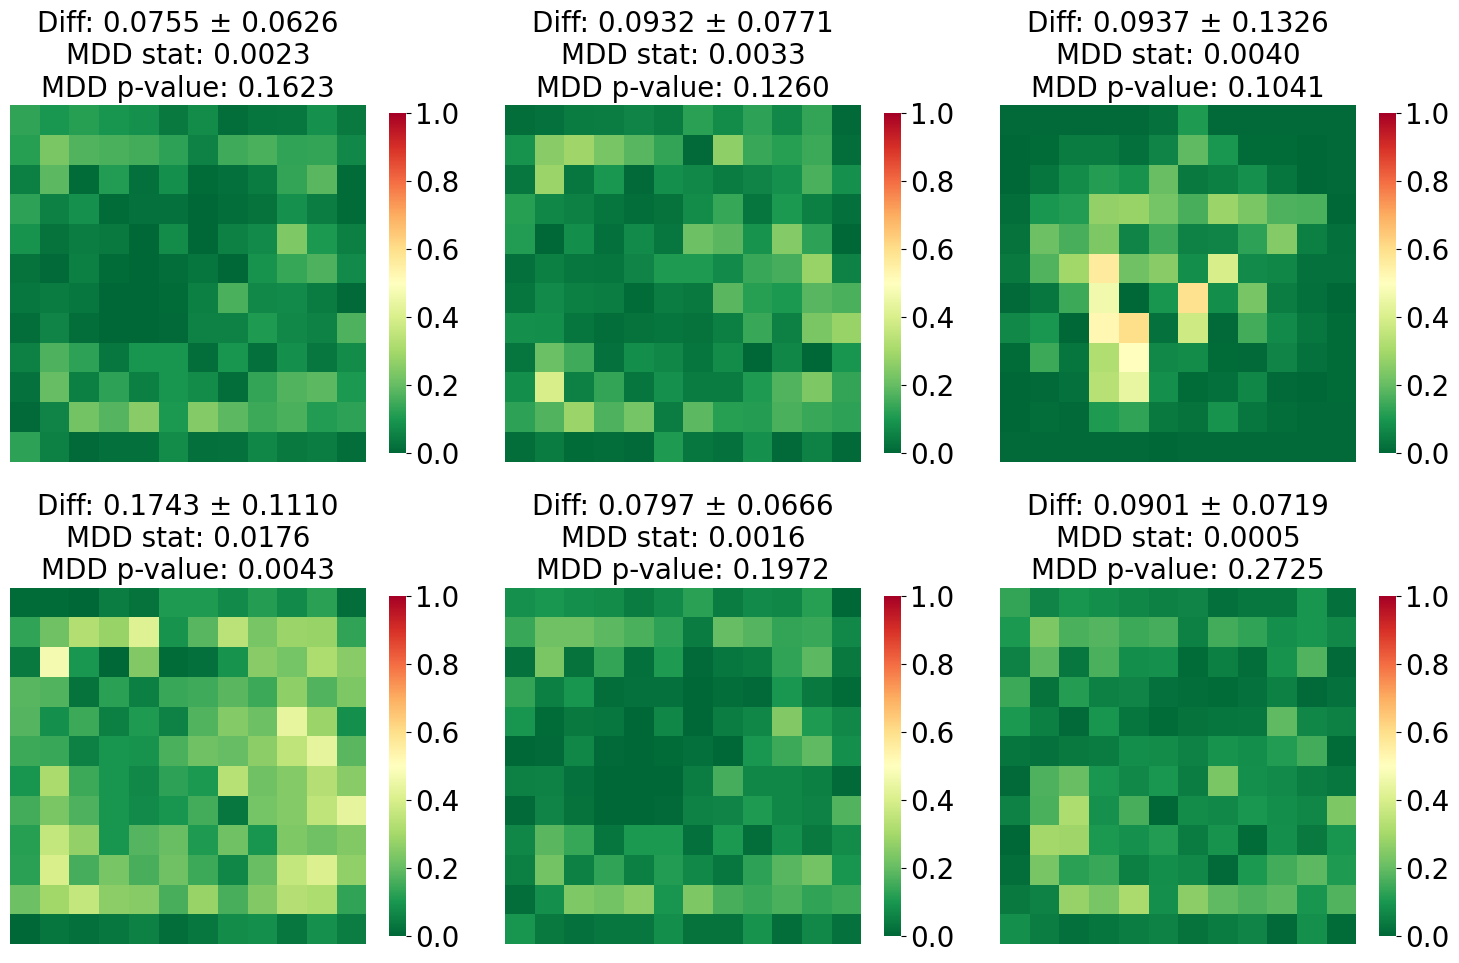

In [55]:
word1 = 'preta'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'branca'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

QTD vermelha: 19
QTD vermelho: 93


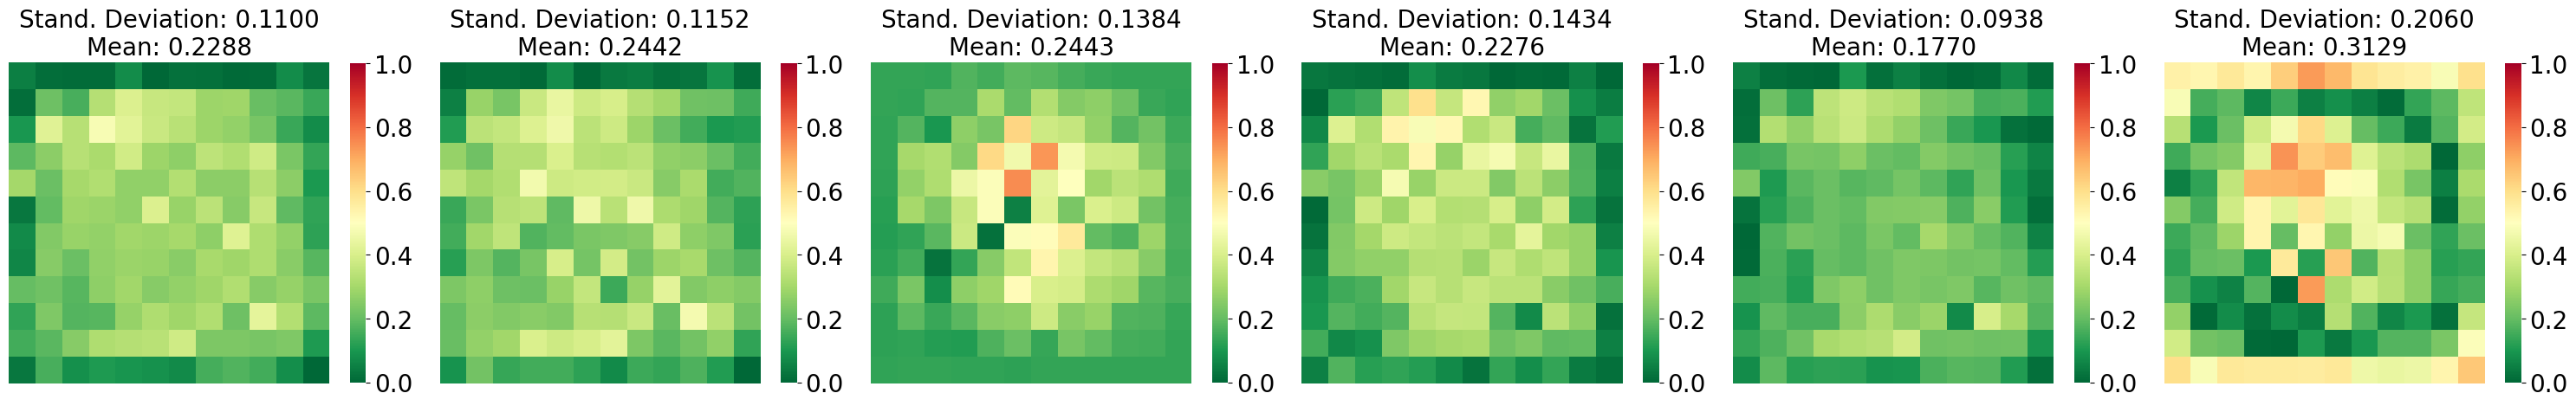

In [37]:
word1 = 'vermelha'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'vermelho'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

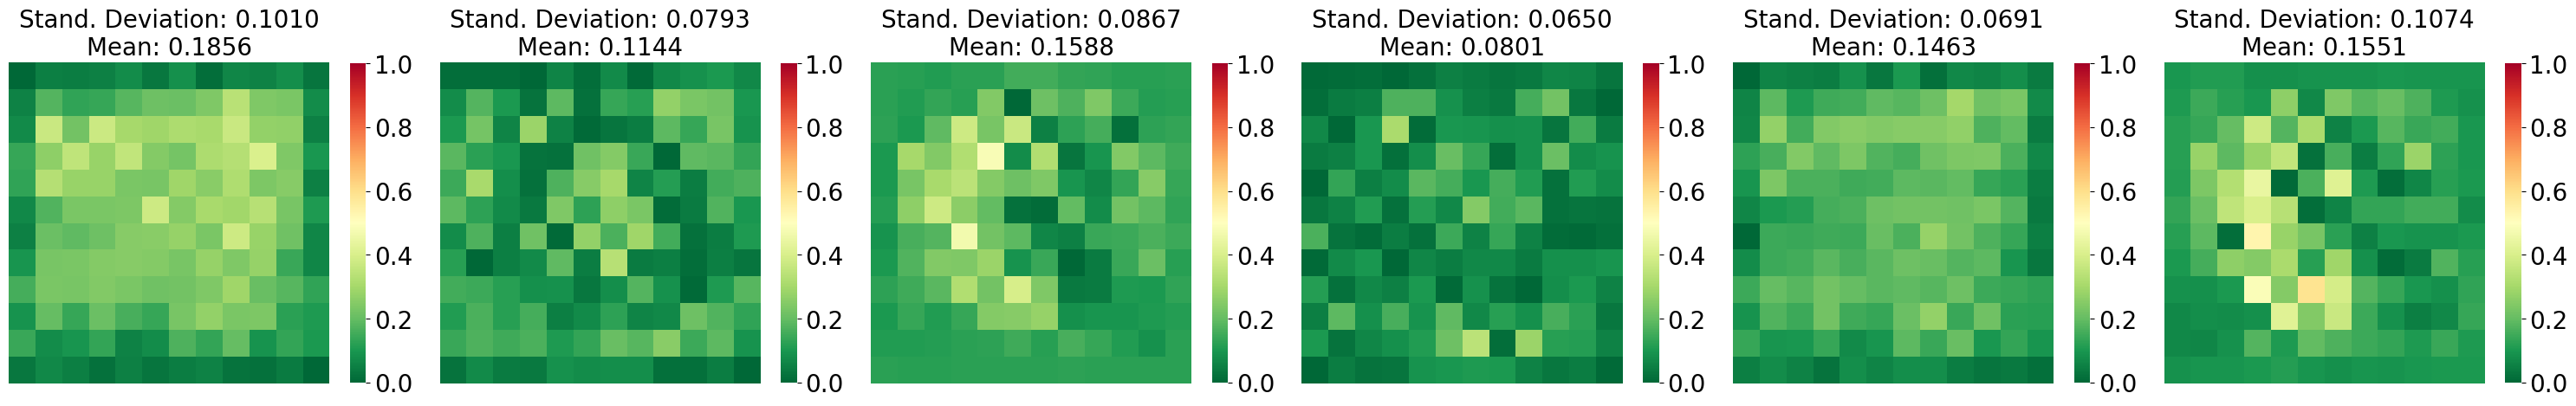

In [8]:
word1 = 'preto'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'vermelho'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

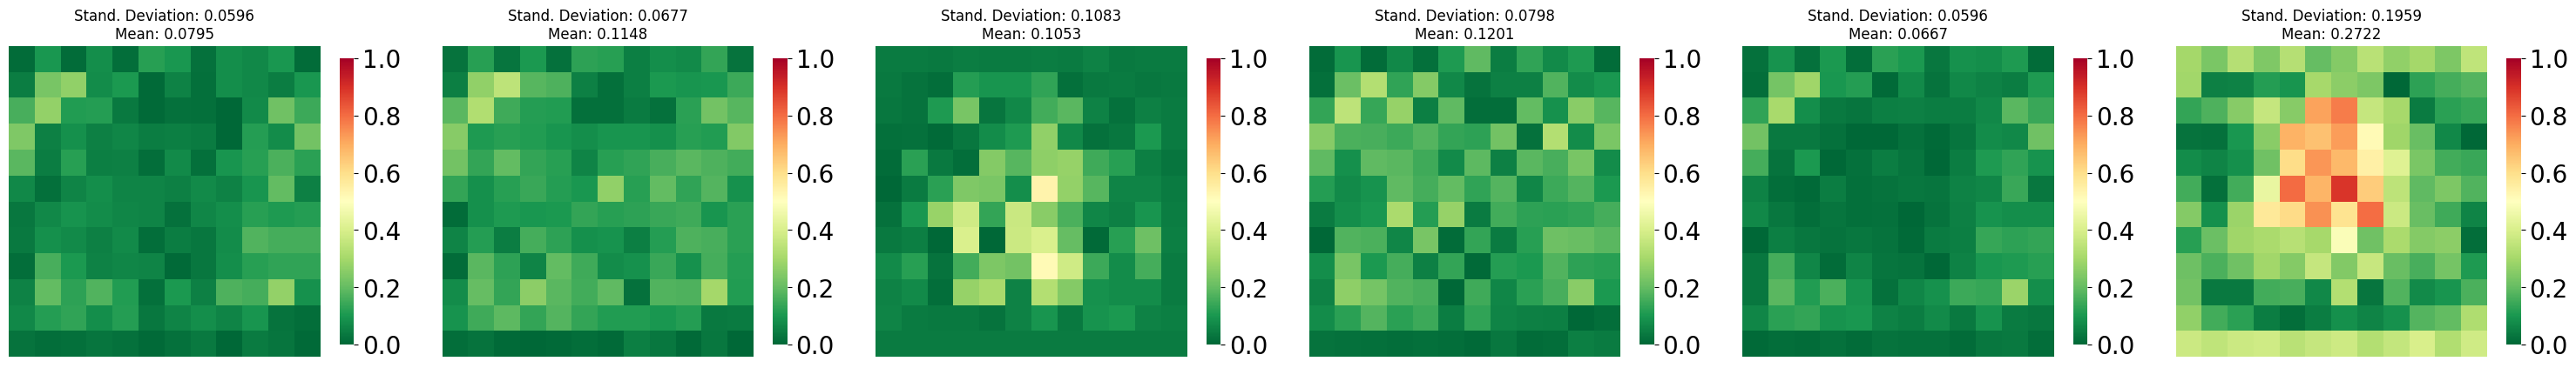

In [61]:
word1 = 'preta'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'azul'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .7})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

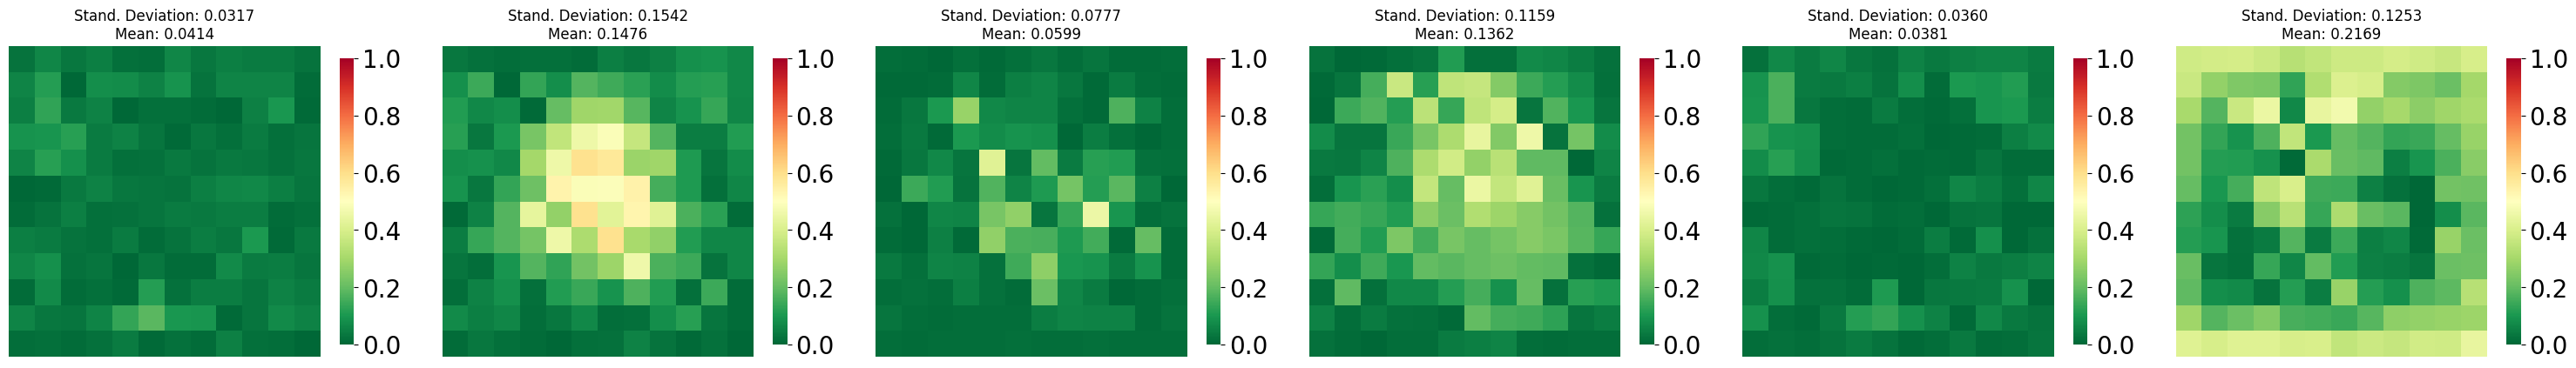

In [62]:
word1 = 'preto'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'azul'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .7})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

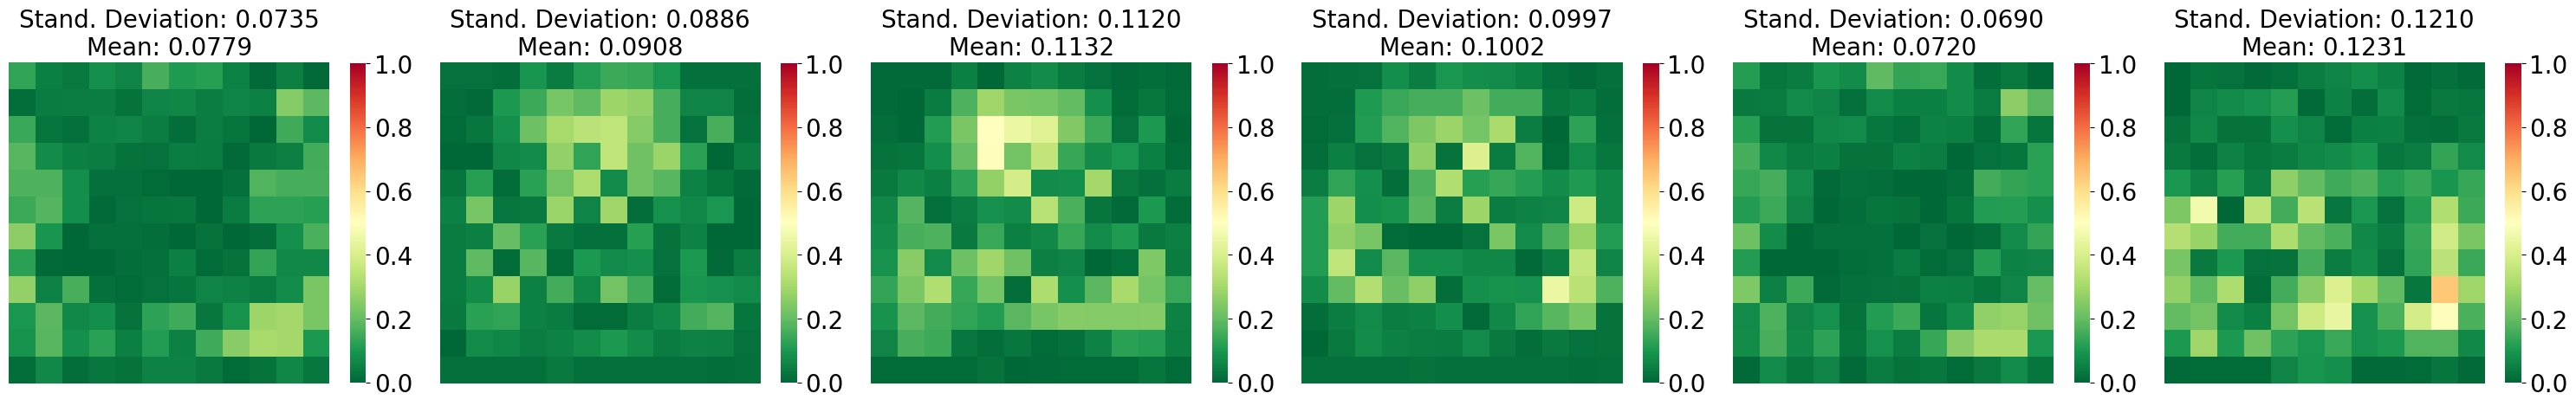

In [9]:
word1 = 'andando'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'correndo'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

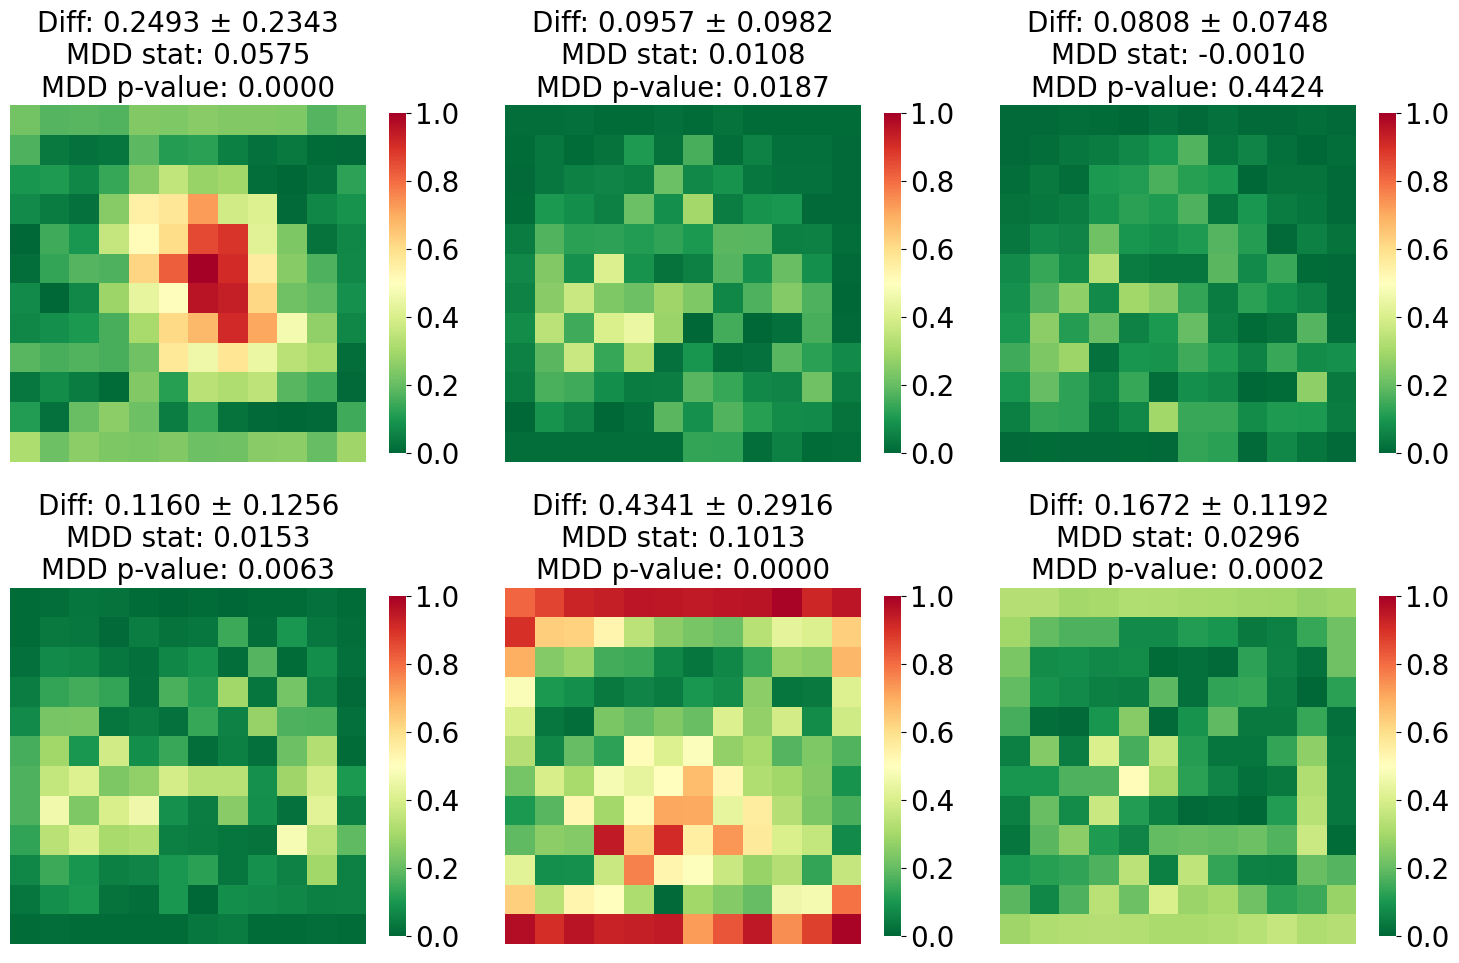

In [56]:
word1 = 'andando'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'andar'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

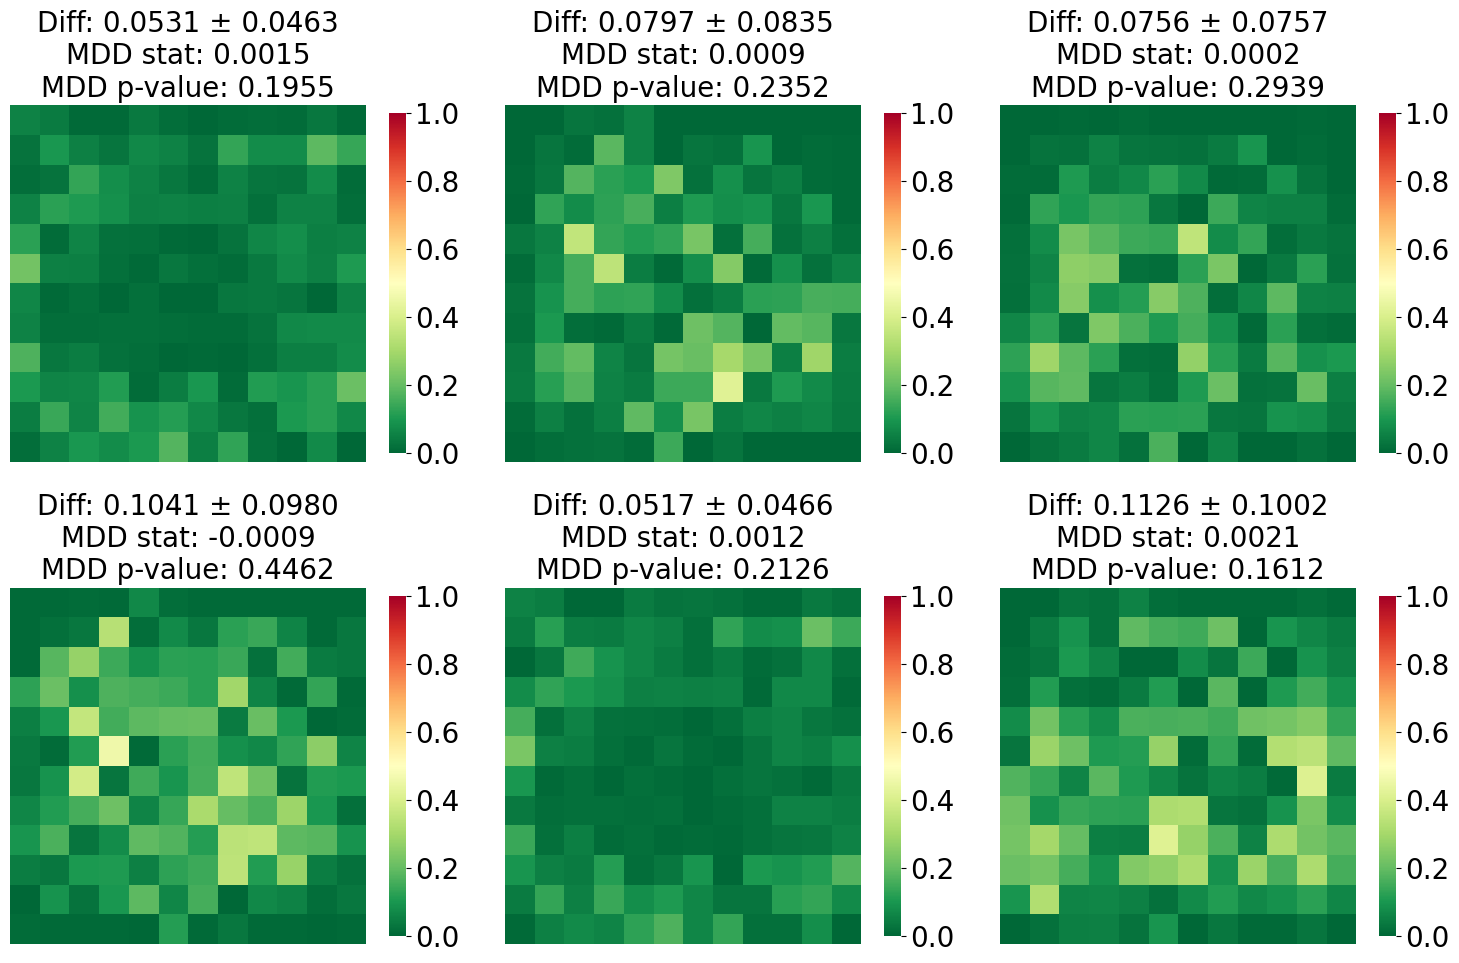

In [57]:
word1 = 'jogando'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'andando'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

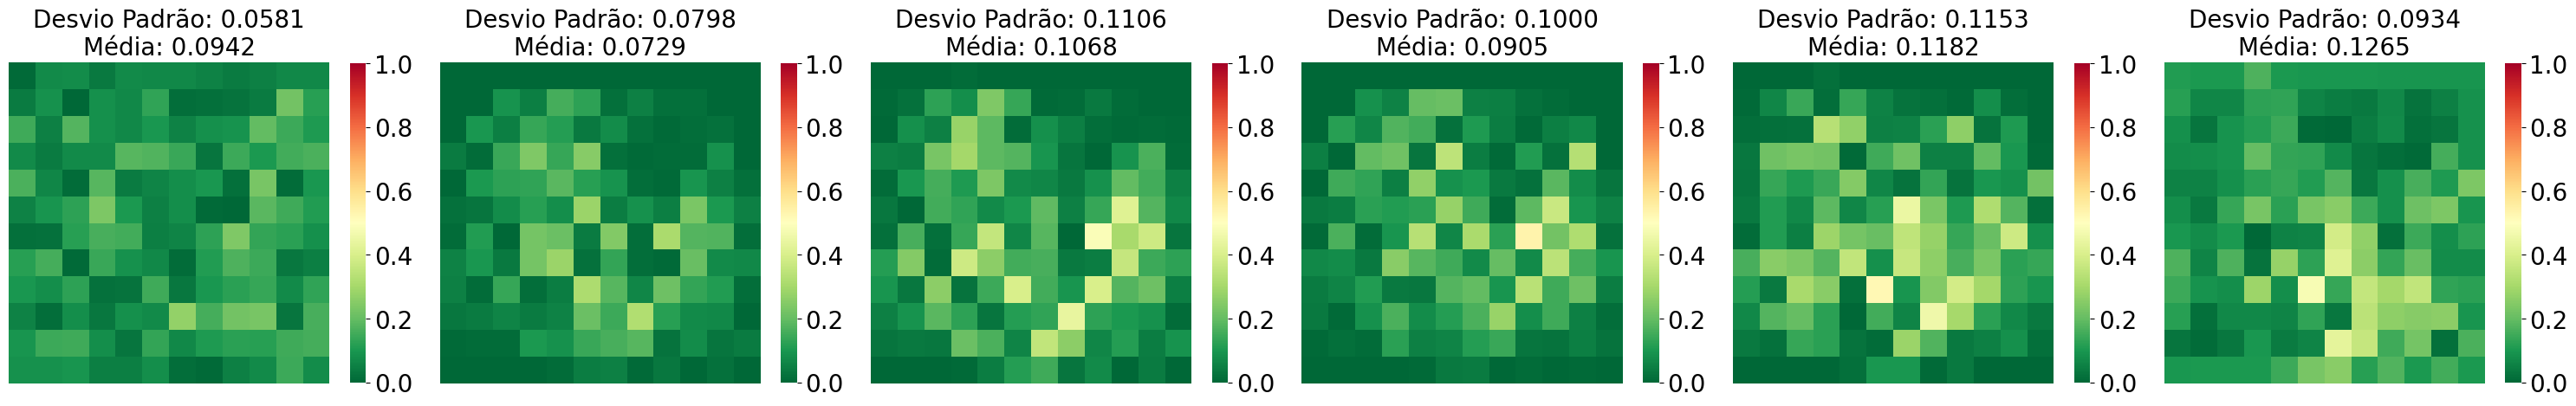

In [6]:
word1 = 'jogar'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'trabalhar'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD andando: 29
QTD andar: 18


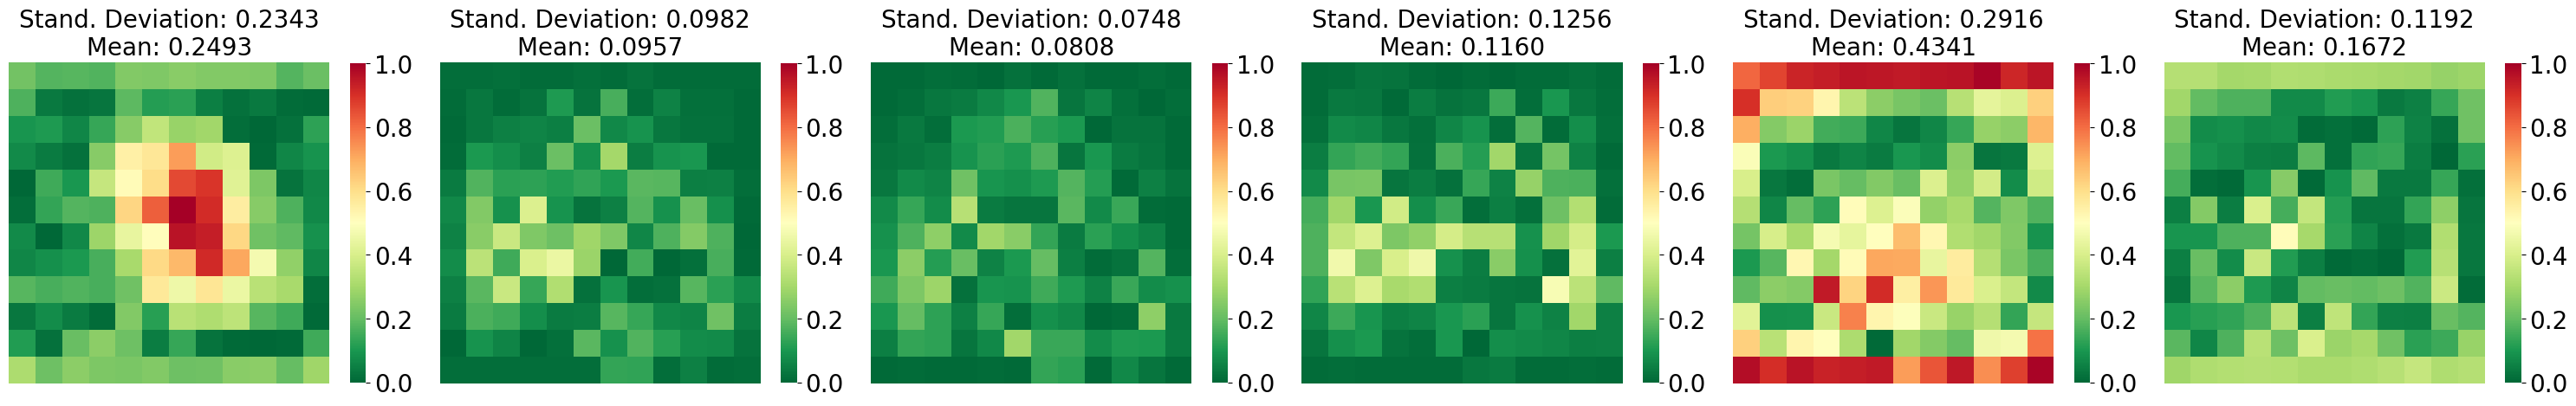

In [16]:
word1 = 'andando'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'andar'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD jogando: 27
QTD andando: 29


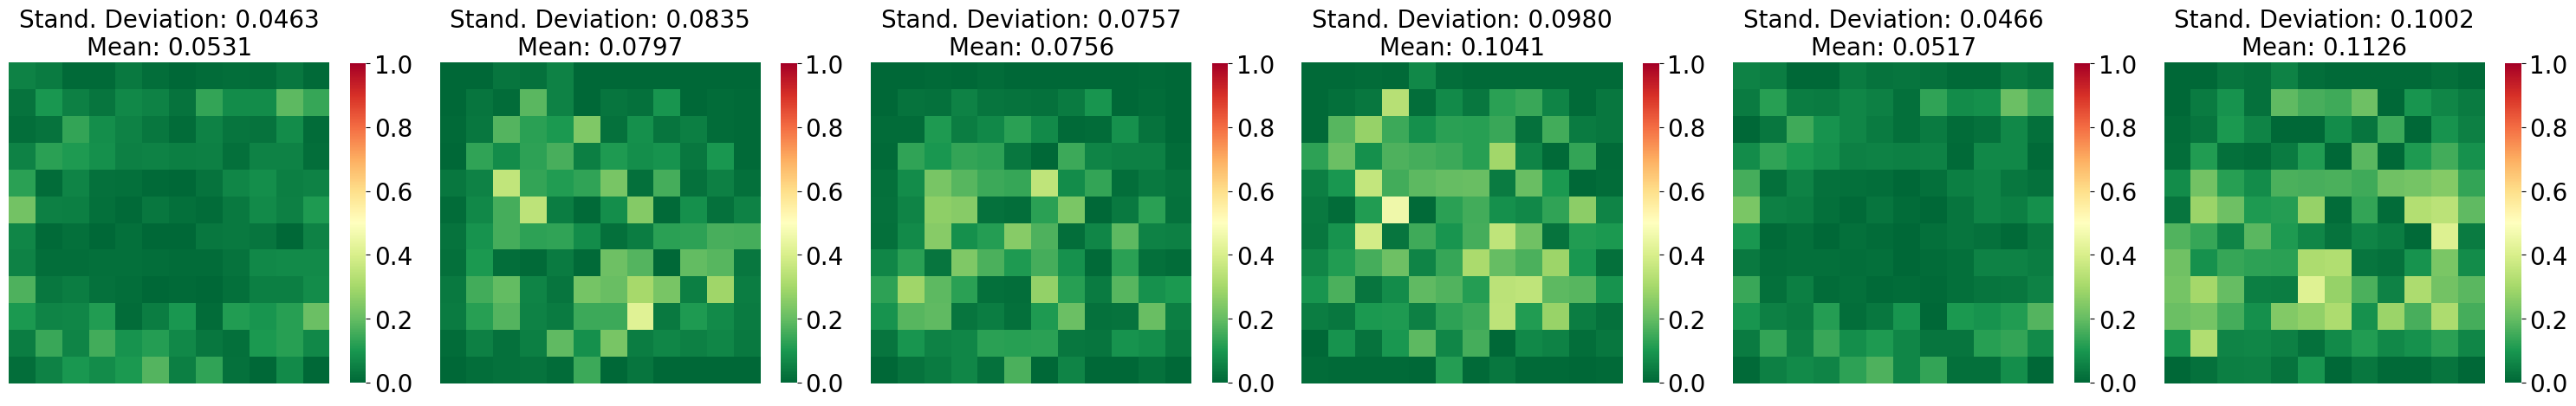

In [20]:
word1 = 'jogando'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'andando'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

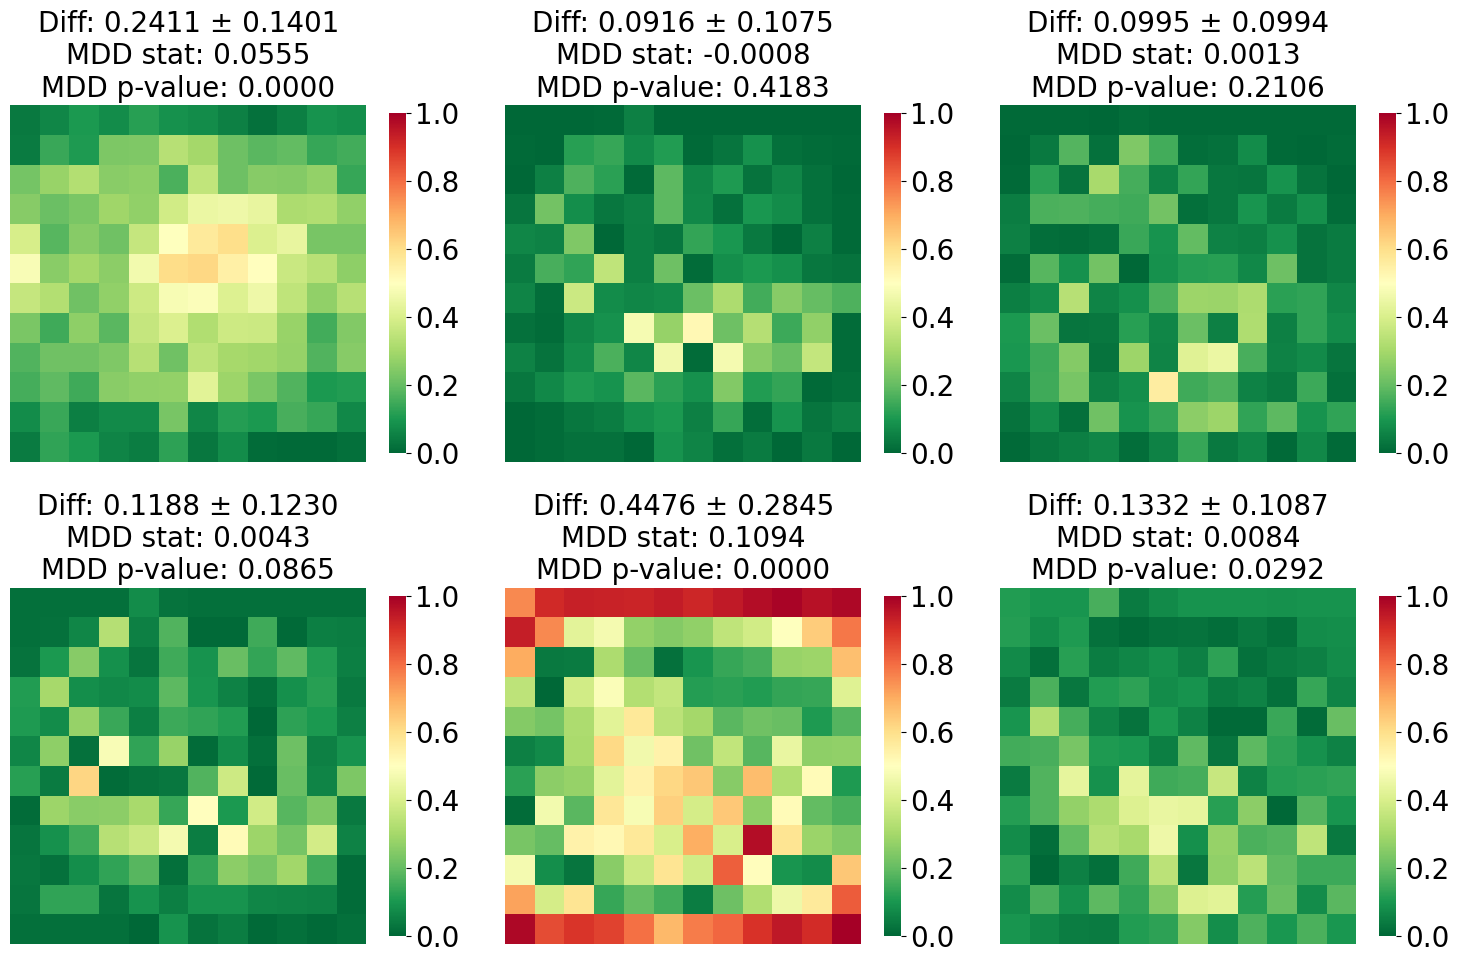

In [58]:
word1 = 'jogando'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'jogar'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

QTD trabalhando: 6
QTD trabalhar: 26


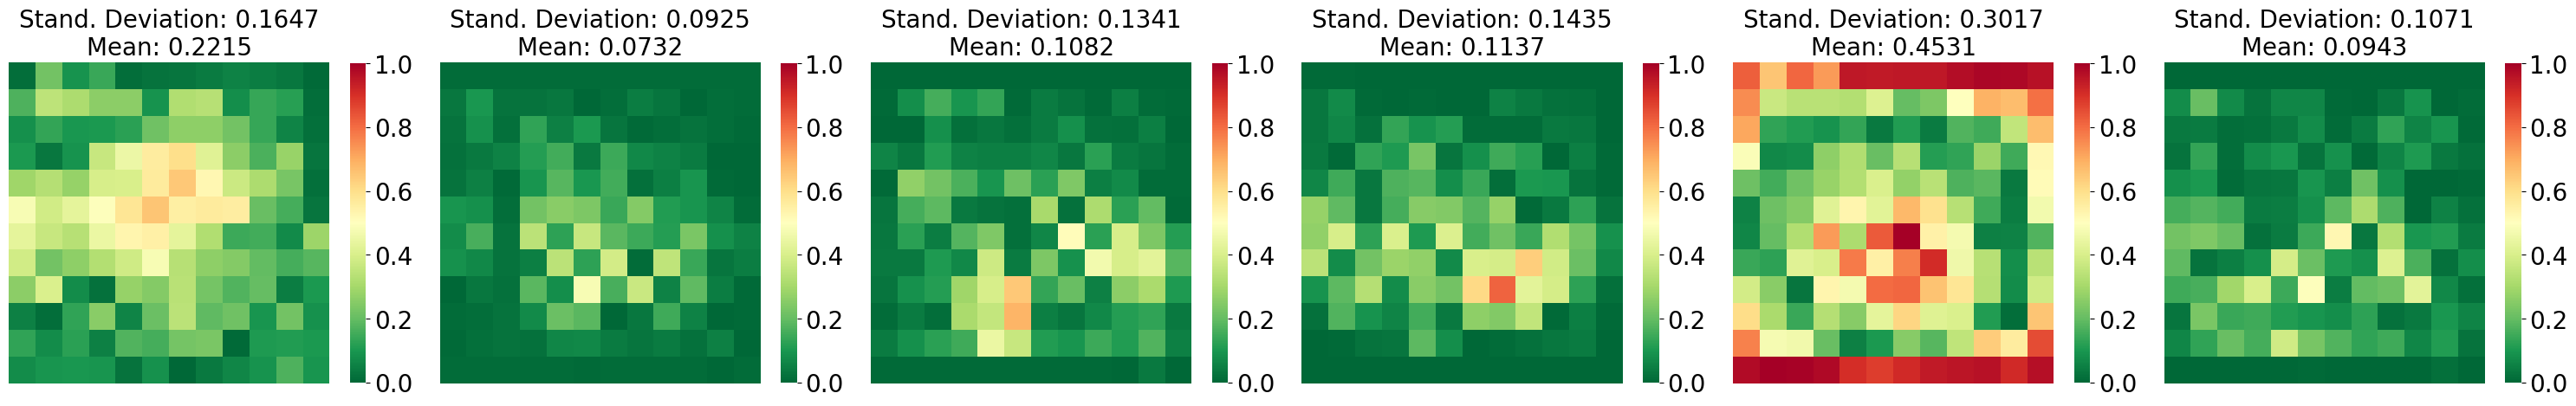

In [21]:
word1 = 'trabalhando'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'trabalhar'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD jogar: 29
QTD trabalhar: 26


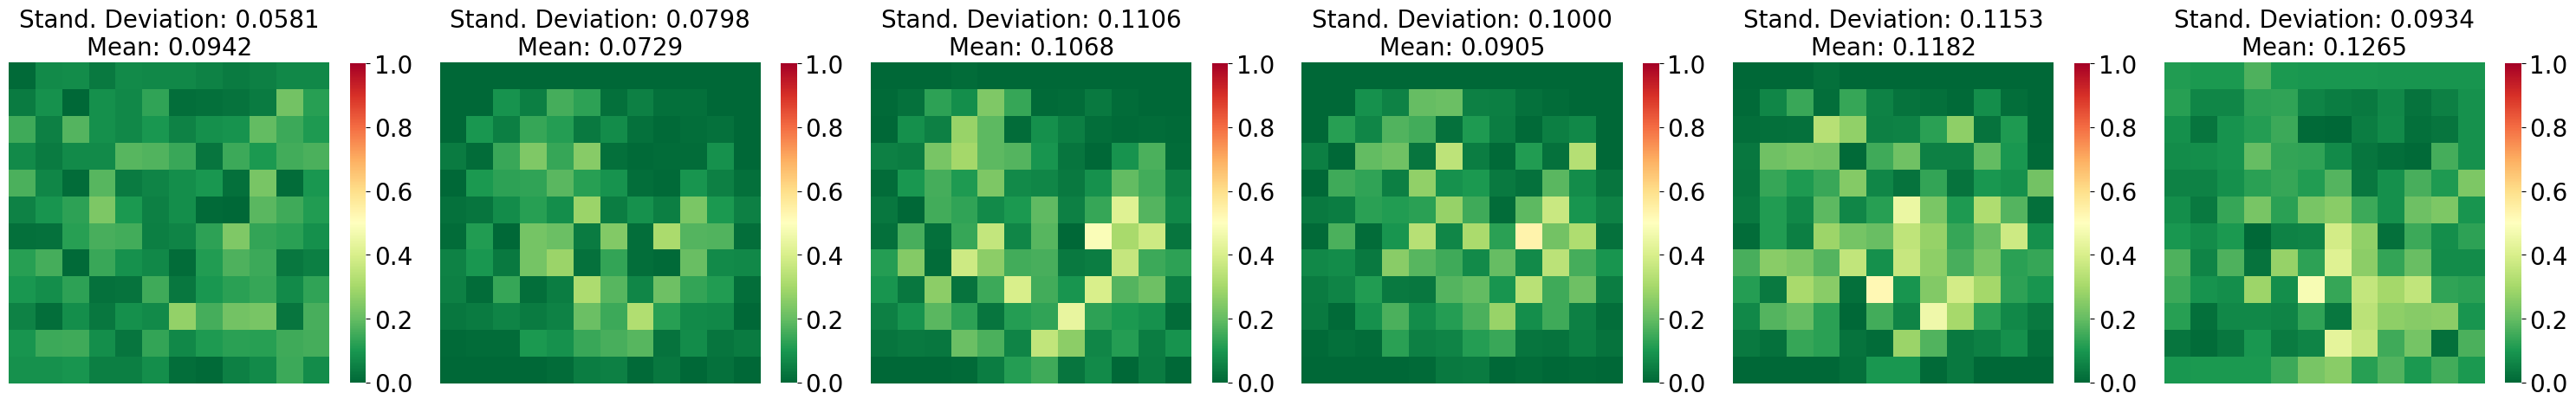

In [26]:
word1 = 'jogar'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'trabalhar'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD dançando: 14
QTD correndo: 24


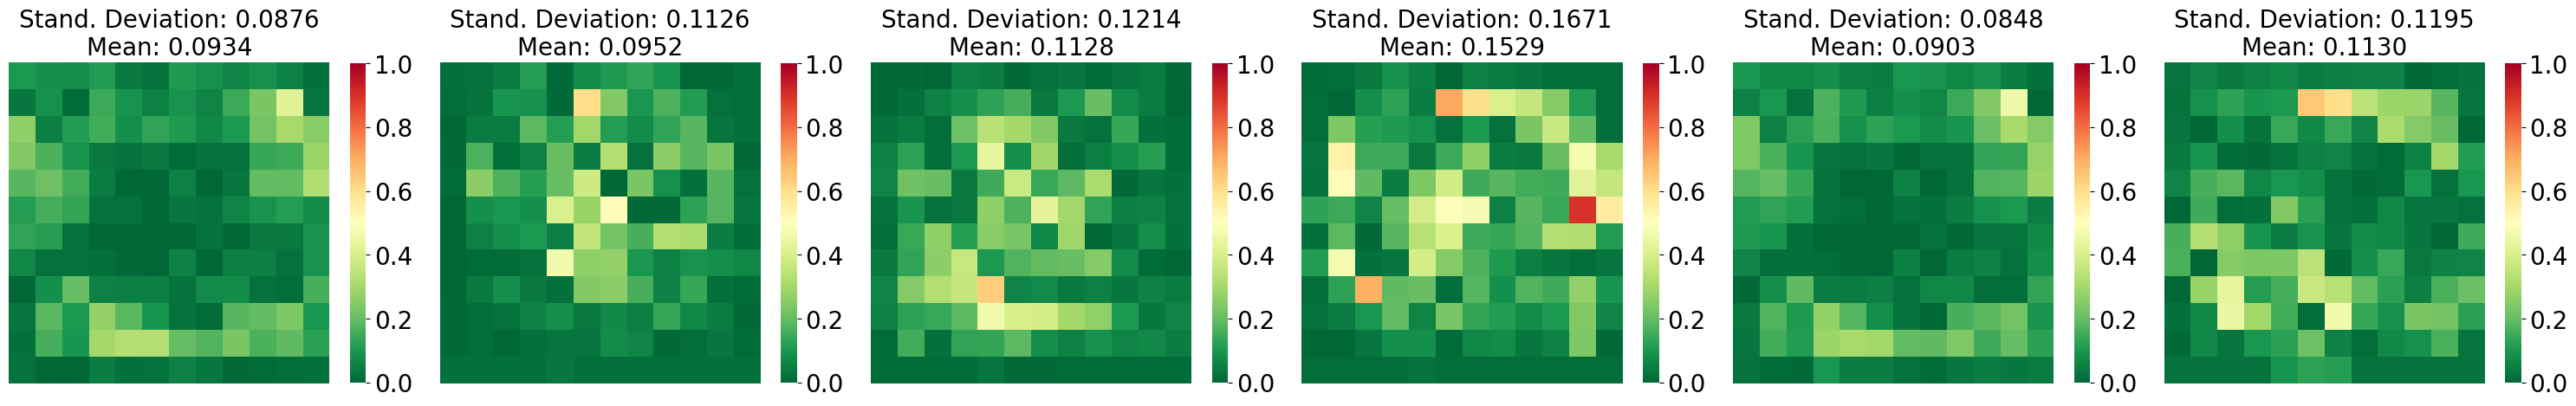

In [7]:
word1 = 'dançando'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'correndo'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD correr: 33
QTD olhar: 42


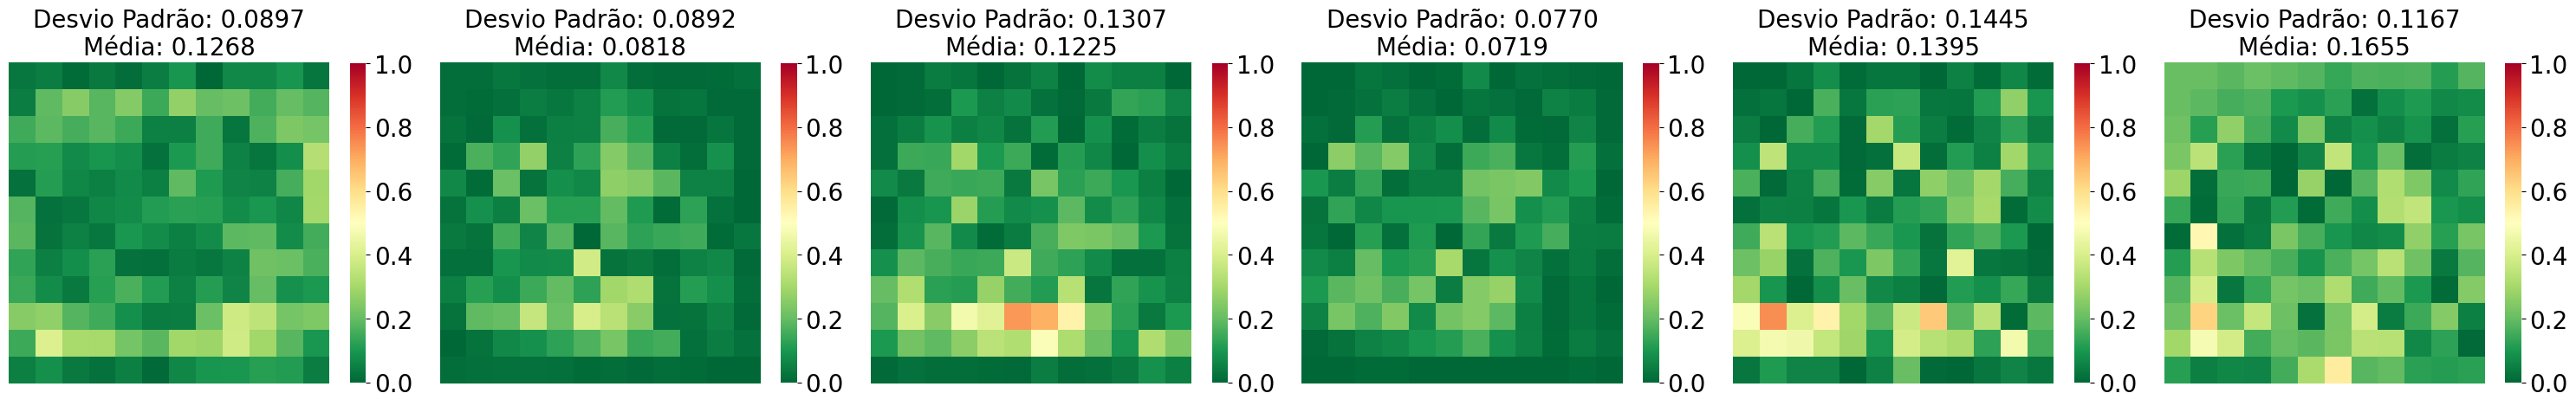

In [27]:
word1 = 'correr'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'olhar'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD trabalhando: 6
QTD trabalhar: 26


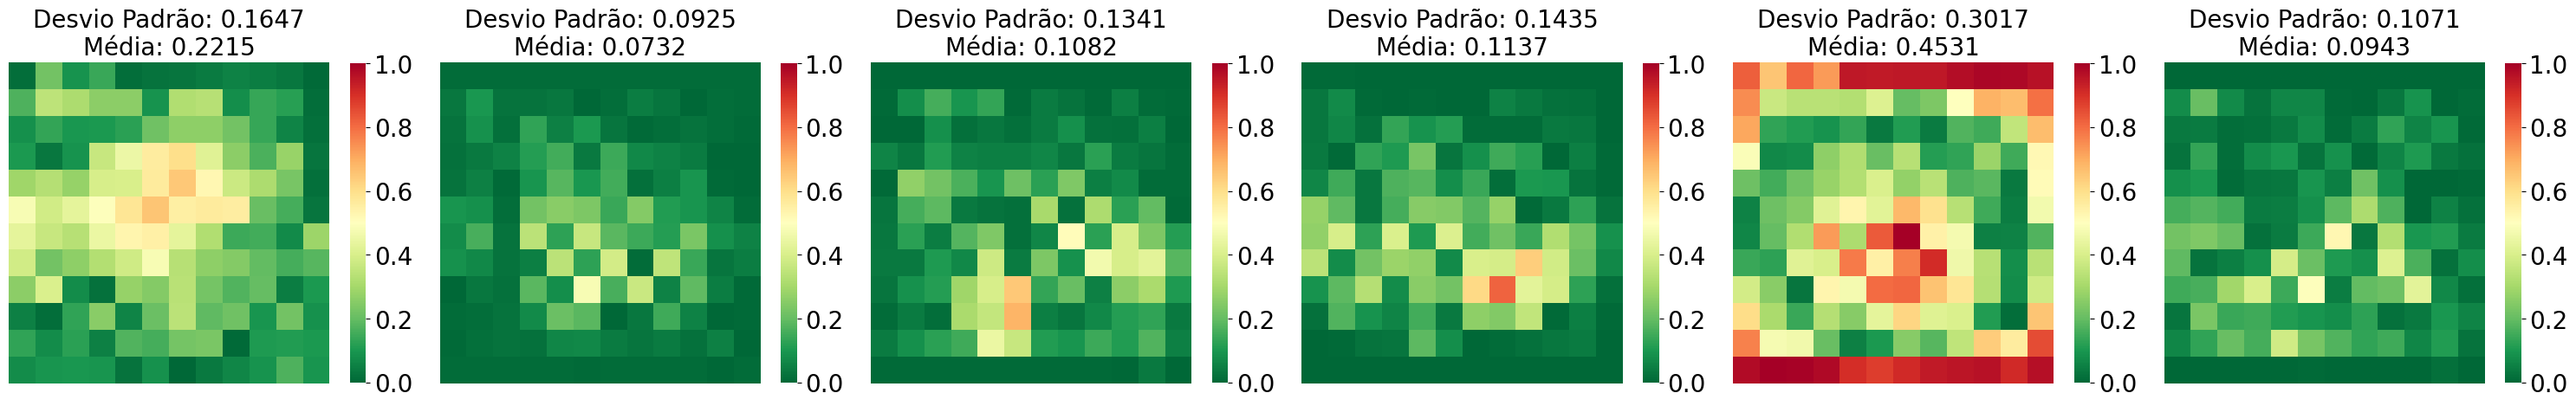

In [28]:
word1 = 'trabalhando'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'trabalhar'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Desvio Padrão: {heads[head].flatten().std():.4f}' \
                            f'\nMédia: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD brincar: 18
QTD brincando: 5


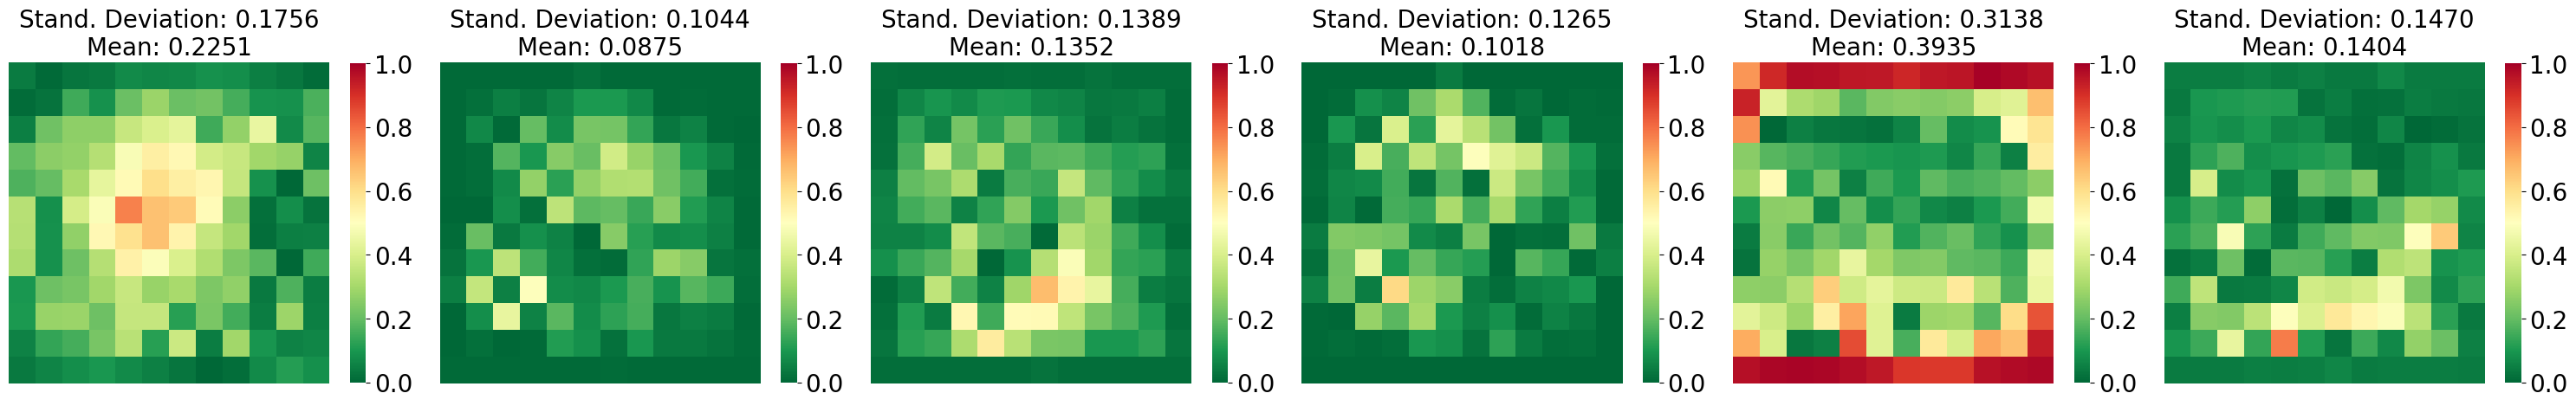

In [25]:
word1 = 'brincar'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'brincando'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlGn_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )